**LOCOTUBRE**

Leanne Kendall, Brenna Rojek, Chancellor Tang

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import os
import sys
import json
import webbrowser 
import spotipy.util as util
from json.decoder import JSONDecodeError
import base64
import numpy as np

**Importing the Data**

The first thing we did was import the data. We manually imputted each matchup from past years and the seeds of the winning and losing songs. The format is displayed in the head function of the locotubre database. The 'locotubre_test' csv file contains the current locotubre competition matchups and their seeds.

In [218]:
locotubre_data = [
    ['2017', 'Vivir Mi Vida', 'Marc Anthony', 1, 'Mi Primer Millón', 'Bacilos' , 16],
    ['2017', 'Soy Yo', 'Bomba Estereo', 2, 'Eres Para Mi', 'Julieta Venegas',15],
    ['2017', 'La Gozadera', 'Gente De Zona', 3, 'Tengo Tu Love', 'Sie7e',14],
    ['2017', 'El Mismo Sol', 'Alvaro Soler', 4, 'Caótica Belleza', 'Esteman',13],
    ['2017', 'El Perdon', 'Nicky Jam, Enrique Iglesias', 5, """Echa Pa'lla""", 'Pitbull',12],
    ['2017', 'Stand By Me', 'Prince Royce', 6, 'Picky', 'Joey Montana',11],
    ['2017', 'Waka Waka', 'Shakira', 7, 'Carnaval', 'Maluma',10],
    ['2017', 'Limbo', 'Daddy Yankee', 8, 'Creo En Mi', 'Natalia Jimenez',9],
    ['2017', 'Vivir Mi Vida', 'Marc Anthony', 1, 'Limbo', 'Daddy Yankee', 8],
    ['2017', 'El Mismo Sol', 'Alvaro Soler', 4, 'El Perdon', 'Nicky Jam, Enrique Iglesias', 5],
    ['2017', 'Waka Waka', 'Shakira', 7, 'Soy Yo', 'Bomba Estereo', 2],
    ['2017', 'La Gozadera', 'Gente De Zona', 3, 'Stand By Me', 'Prince Royce', 6],
    ['2017', 'Vivir Mi Vida', 'Marc Anthony', 1, 'El Mismo Sol', 'Alvaro Soler', 4],
    ['2017', 'Waka Waka', 'Shakira', 7, 'La Gozadera', 'Gente De Zona', 3],
    ['2017', 'Waka Waka', 'Shakira', 7, 'Vivir Mi Vida', 'Marc Anthony', 1],
    ['2018', 'Mi Gente', 'J. Balvin', 1, 'Baila', 'Esteman', 16],
    ['2018', 'Internacionales', 'Bomba Estereo', 2, 'Chicas De Revista', 'Beatriz Luengo', 15],
    ['2018', 'Andas En Mi Cabeza', 'Chino y Nacho', 4, 'Prueba De Amor', 'Sie7e', 13],
    ['2018', 'Yo Contigo, Tú Conmigo', 'Morat, Alvaro Soler', 5, 'Brindo Por Ti', 'Macaco', 12],
    ['2018', 'Cuando Te Veo', 'ChocQuibTown', 6, 'Aprender A Quererte', 'Morat', 11],
    ['2018', 'La Bicicleta', 'Shakira', 9, 'La Tierra Olvido', 'Fanny Lu, Fonseca, Maluma, Carlos Vives', 8],
    ['2018', 'Voy Ganao', 'Systema Solar', 10, 'No Soy Como Crees', 'Ana Mena', 7],
    ['2018', 'Robarte Un Beso', 'Carlos Vives', 14, 'Volar', 'Alvaro Soler', 3],  
    ['2018', 'Mi Gente', 'J. Balvin', 1, 'La Bicicleta', 'Shakira', 9],
    ['2018', 'Andas En Mi Cabeza', 'Chino y Nacho', 4, 'Yo Contigo, Tú Conmigo', 'Morat, Alvaro Soler', 5],
    ['2018', 'Voy Ganao', 'Systema Solar', 10, 'Internacionales', 'Bomba Estereo', 2],
    ['2018', 'Robarte Un Beso', 'Carlos Vives', 14, 'Cuando Te Veo', 'ChocQuibTown', 6],
    ['2018', 'Andas En Mi Cabeza', 'Chino y Nacho', 4, 'Mi Gente', 'J. Balvin', 1],
    ['2018', 'Robarte Un Beso', 'Carlos Vives', 14, 'Voy Ganao', 'Systema Solar', 10],
    ['2018', 'Robarte Un Beso', 'Carlos Vives', 14, 'Andas En Mi Cabeza', 'Chino y Nacho', 4],    
    ['2019', 'Échame La Culpa', 'Demi Lovato, Luis Fonsi', 1, 'Tan Fácil', 'Cnco', 16],
    ['2019', 'Cásate Conmigo', 'Nicky Jam, Silvestre Dangond', 2, 'La La La', 'Shakira', 15],
    ['2019', 'Lo Mismo', 'Alvaro Soler, Maitre Gims', 14, 'Almost Liking Praying', 'Lin Manuel Miranda, Artists for Puerto Rico', 3],
    ['2019', 'Love', 'Sebastian Yatra', 4, '30 de Febrero', 'Ha Ash', 13],
    ['2019', 'Besos En Guerra', 'Morat, Juanes', 5, 'Me Gusta', 'Cocoa Roots', 12],
    ['2019', 'Quédate Conmigo', 'Chyno Miranda, Wisin, Gente De Zona', 11, 'Puebla', 'Alvaro Soler', 6],
    ['2019', 'Toc Toc', 'Macaco', 7, 'To My Love', 'Bomba Estereo', 10],
    ['2019', 'Madre Tierra', 'Chayanne', 9, 'No Tengo Dinero', 'Maffio', 8],
    ['2019', 'Échame La Culpa', 'Demi Lovato, Luis Fonsi', 1, 'Madre Tierra', 'Chayanne', 9],
    ['2019', 'Cásate Conmigo', 'Nicky Jam, Silvestre Dangond', 2, 'Toc Toc', 'Macaco', 7],
    ['2019', 'Lo Mismo', 'Alvaro Soler, Maitre Gims', 14, 'Quédate Conmigo', 'Chyno Miranda, Wisin, Gente De Zona', 11],
    ['2019', 'Love', 'Sebastian Yatra', 4, 'Besos En Guerra', 'Morat, Juanes', 5],
    ['2019', 'Love', 'Sebastian Yatra', 4, 'Échame La Culpa', 'Demi Lovato, Luis Fonsi', 1],
    ['2019', 'Lo Mismo', 'Alvaro Soler, Maitre Gims', 14, 'Cásate Conmigo', 'Nicky Jam, Silvestre Dangond', 2],
    ['2019', 'Lo Mismo', 'Alvaro Soler, Maitre Gims', 14, 'Love', 'Sebastian Yatra', 4],
    ['2020',  'Un Año', 'Sebastian Yatra, Reik', 1, 'Me Equivoqué', 'Ventino', 16],
    ['2020', 'Cuando Nadie Ve', 'Morat', 2, 'Un Poquito', 'Carlos Vives, Diego Torres', 15],
    ['2020', 'La Libertad', 'Alvaro Soler', 3, 'Teléfono', 'Aitana', 14],
    ['2020', 'Somos Los Prietos', 'ChocQuibTown', 13, 'Si Tú La Ves', 'Nicky Jam, Wisin', 4],
    ['2020', 'Llegaste Tú', 'CNCO, Prince Royce', 5, 'De Ellos Aprendí', 'David Rees', 12],
    ['2020', 'Swing', 'Danny Ocean', 11, 'Kitipun', 'Juan Luis Guerra', 6],
    ['2020', 'Aleluya', 'Reik, Manuel Turizo', 10, 'La Plata', 'Juanes, Lalo Ebratt', 7],
    ['2020', 'Tutu', 'Pedro Capo, Camilo', 8, '100 Años', 'Prince Royce, Ha-Ash', 9],
    ['2020', 'Un Año', 'Sebastian Yatra, Reik', 1, 'Tutu', 'Pedro Capo, Camilo', 8],
    ['2020', 'Cuando Nadie Ve', 'Morat', 2, 'Swing', 'Danny Ocean', 11],
    ['2020', 'La Libertad', 'Alvaro Soler', 3, 'Aleluya', 'Reik, Manuel Turizo', 10],
    ['2020', 'Somos Los Prietos', 'ChocQuibTown', 13, 'Llegaste Tú', 'CNCO, Prince Royce', 5],
    ['2020', 'La Libertad', 'Alvaro Soler', 3, 'Cuando Nadie Ve', 'Morat', 2],
    ['2020', 'Un Año', 'Sebastian Yatra', 1, 'Somos Los Prietos', 'ChocQuibTown', 13],
    ['2020', 'La Libertad', 'Alvaro Soler', 3, 'Un Año', 'Sebastian Yatra', 1]
]

loco_head = ['CYear', 'WSong', 'WArtist', 'WSeed', 'LSong', 'Lartist', 'Lseed']

current_head = ['CYear', 'hsong', 'hartist', 'high_seed', 'lsong', 'lartist', 'low_seed']
current_list = [
    ['current', 'Waka Waka', 'Shakira', 1, 'Voy Ganao', 'Systema Solar', 16],
    ['current', 'Lo Mismo', 'Alvaro Soler, Maitre Gims', 2, 'Cuando Nadie Ve', 'Morat', 15],
    ['current', 'Robarte Un Beso', 'Carlos Vives, Sebastian Yatra', 3, 'Soy Yo', 'Bomba Estereo', 14],
    ['current', 'La Libertad', 'Alvaro Soler', 4, 'Baila', 'Esteman', 13],
    ['current', 'Vivir Mi Vida', 'Marc Anthony', 5, 'Somos Los Prietos', 'ChocQuibTown', 12],
    ['current', 'Andas En Mi Cabeza', 'Chino y Nacho', 6, 'Échame La Culpa', 'Demi Lovato, Luis Fonsi', 11],
    ['current', 'Un Año', 'Sebastian Yatra, Reik', 7, 'El Mismo Sol', 'Alvaro Soler', 10],
    ['current', 'Cásate Conmigo', 'Nicky Jam, Silvestre Dangond', 8, 'Mi Gente', 'J Balvin', 9]
]

locotubre = pd.DataFrame(data = locotubre_data, columns = loco_head)
locotubre_test = pd.DataFrame(data = current_list, columns = current_head)


In [219]:
locotubre.head(15)

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12
5,2017,Stand By Me,Prince Royce,6,Picky,Joey Montana,11
6,2017,Waka Waka,Shakira,7,Carnaval,Maluma,10
7,2017,Limbo,Daddy Yankee,8,Creo En Mi,Natalia Jimenez,9
8,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8
9,2017,El Mismo Sol,Alvaro Soler,4,El Perdon,"Nicky Jam, Enrique Iglesias",5


In [220]:
locotubre_test.head()

,CYear,hsong,hartist,high_seed,lsong,lartist,low_seed
0,current,Waka Waka,Shakira,1,Voy Ganao,Systema Solar,16
1,current,Lo Mismo,"Alvaro Soler, Maitre Gims",2,Cuando Nadie Ve,Morat,15
2,current,Robarte Un Beso,"Carlos Vives, Sebastian Yatra",3,Soy Yo,Bomba Estereo,14
3,current,La Libertad,Alvaro Soler,4,Baila,Esteman,13
4,current,Vivir Mi Vida,Marc Anthony,5,Somos Los Prietos,ChocQuibTown,12


**Creating Columns**

The first column we created was the seed_diff column. This column subtracted the winning seed from the losing seed. We modified this value to be an absolute value in the abs_seed_diff column later in this notebook in order to be a viable independent variable to predict the winner (since we don't know who the winner is yet, we can only use the difference between the seeds not the winning seed minus the losing seed). Next we created an upset variable that told us whether or not this matchup produced an upset, meaning the losing seed beat the winning seed. 

In [221]:
locotubre['seed_diff']= locotubre.Lseed-locotubre.WSeed
locotubre.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7


In [222]:
locotubre['upset'] = np.where(locotubre['seed_diff']<0, 1, 0)


Next, we created high seed and low seed columns. The high seed column was created by taking the minimum number between the winning seed and losing seed and the low seed column was created by taking the maximum. These columns will be very important for merging our dataframes and creating more calculated columns down the line. 

In [223]:
locotubre["high_seed"] = locotubre[["WSeed", "Lseed"]].min(axis=1)
locotubre["low_seed"]=locotubre[["Lseed", "WSeed"]].max(axis=1)
locotubre.head(15)

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11,0,3,14
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9,0,4,13
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7,0,5,12
5,2017,Stand By Me,Prince Royce,6,Picky,Joey Montana,11,5,0,6,11
6,2017,Waka Waka,Shakira,7,Carnaval,Maluma,10,3,0,7,10
7,2017,Limbo,Daddy Yankee,8,Creo En Mi,Natalia Jimenez,9,1,0,8,9
8,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8,7,0,1,8
9,2017,El Mismo Sol,Alvaro Soler,4,El Perdon,"Nicky Jam, Enrique Iglesias",5,1,0,4,5


We wanted to view how many upsets were in our dataset. The code below shows us that there were 36 non-upsets and 24 upsets. That tells us that the seeding is not very accurate, since perfect seeding would produce 0 upsets. 

In [224]:
locotubre['upset'].value_counts()

0    36
1    24
Name: upset, dtype: int64

Below is the code that calculates the seed difference with no negative values (hence abs_seed_diff). We calculated it by subtracting the high seed from the low seed in both the train and test dataframes. 

In [225]:
combine = [locotubre, locotubre_test]
for dataset in combine:
    dataset['abs_seed_diff']= dataset['low_seed']-dataset['high_seed']
locotubre.describe()

,WSeed,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,6.050000,8.433333,2.383333,0.400000,3.783333,10.700000,6.916667
std,4.462366,4.633579,7.796330,0.494032,2.538461,3.674465,4.231807
min,1.000000,1.000000,-12.000000,0.000000,1.000000,3.000000,1.000000
25%,2.000000,4.750000,-3.250000,0.000000,2.000000,8.750000,3.000000
50%,4.500000,8.500000,3.000000,0.000000,3.000000,11.000000,7.000000
75%,9.250000,12.000000,8.250000,1.000000,5.250000,14.000000,10.000000
max,14.000000,16.000000,15.000000,1.000000,11.000000,16.000000,15.000000


Below, we print the shape of our dataframe which tells us we have 60 records and 12 columns or fields. 

In [226]:
print(locotubre.shape)

(60, 12)


**IMPORTING LIBRARIES**

To import the correct libraries, we first had to pip install the spotipy library, to extract data from the spotify API, and the requests library, to get the authorization keys and run them to authenticate the spotify developer account so we could connect to the API.

From there, we imported the necessary libraries for this project.

In [227]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import os
import sys
import json
import webbrowser 
import spotipy.util as util
from json.decoder import JSONDecodeError
import base64
import requests

**Auhtorization for the Spotify API**

To connect to the Spotify API, we had to connect to the API by using our spotify credentials (spotify_id, spotify_secret) in the function below to allow this code to extract spotify data from the API. 

In [228]:
spotify_id = '66bc255077d74940a6272a0d2601e6d9'
spotify_secret = 'ffeb8bd48e9a4ec3a68a9749ece515a3'
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(spotify_id,spotify_secret))

**EXTRACTING DATA**

To make extraction easier for me, I created playlists in spotify for all of the past Locura de Marzo tournaments and put them in order by seed. However, there was one song that Spotify did not have (No Tengo Dinero). We had to keep that in mind when running the simulation. 

To get the song ids for each song, we used the getTrackIDs function* to extract every song id from each playlist. All of the lists in id_list contain every song for that year's tournament. From there, we appended each list created by the getTrackIDs function into one list (playlists) so one list would be an item in the playlists list. From there, we extracted each list from playlists and assigned each their own variable to put into a list (playlist_list). The lists in the playlist_list hold the song ids of each tournament.

From there, we used the getTrackFratures function*, which extracts song metadata and returns it as a list. the variable, track_head, is a list that was needed to name columns in the dataframes we are going to make later.

*I credit Sander Horpestad with this code (https://morioh.com/p/31b8a607b2b0)

In [229]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

In [230]:
id_oct = '7flePFOJJdH9movvNzwMsF'
id_17 = '6xWcKO4TZZ4f5UMrxGgLkv'
id_18 = '0uhlhWI8qBI1cn9L4Ibrdd'
id_19 = '59D6faNL4KGt2R6Jg6U7F9'
id_20 = '57mPJ0uEewNBk5RXyTQWkc'

id_list = [id_oct, id_17, id_18, id_19, id_20]

playlists = []
for x in id_list:
    playlists.append(getTrackIDs('3kiizy8ug80fzb41x3bdhq931', x))

In [231]:
playlist_oct = playlists[0]
playlist_17 = playlists[1]
playlist_18 = playlists[2]
playlist_19 = playlists[3]
playlist_20 = playlists[4]

playlist_list = [playlist_oct, playlist_17, playlist_18, playlist_19, playlist_20]

In [232]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

  # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    mode = features[0]['mode']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, key,mode, time_signature]
    return track

In [233]:
track_head = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability',
         'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
         'loudness', 'speechiness', 'tempo', 'key','mode', 'time_signature']

**Creating Dataframes**

To create the dataframes, we repeated the same function for each dataframe because the we could not find a way to create a for loop that could do what we wanted it to do. For we created a track list (track_xx) that is initially empty at first. The for loop uses the playlist list (playlist_xx) of the tournament we are creating the dataframe for. From there, we ran each song id in the playlist list in the getTrackFeatures function to get all the data we needed for each song in spotify. We appended that data into the track_list. Finally, we created a dataframe for that tournament using the fully appended track list as the data and the list of names in track_head as the column names.

The only issue we ran into was that for the df_20, there were two too many songs, so the last function before the next markdown takes out the two that lost in the preliminary round and resets the dataframe index.

In [234]:
track_oct = []
for i in range(len(playlist_oct)):
    track = getTrackFeatures(playlist_oct[i])
    track_oct.append(track)

df_oct = pd.DataFrame(track_oct, columns = track_head)


In [235]:
track_17 = []
for i in range(len(playlist_17)):
    track = getTrackFeatures(playlist_17[i])
    track_17.append(track)

df_17 = pd.DataFrame(track_17, columns = track_head)

In [236]:
track_18 = []
for i in range(len(playlist_18)):
    track = getTrackFeatures(playlist_18[i])
    track_18.append(track)

df_18 = pd.DataFrame(track_18, columns = track_head)

In [237]:
track_19 = []
for i in range(len(playlist_19)):
    track = getTrackFeatures(playlist_19[i])
    track_19.append(track)

df_19 = pd.DataFrame(track_19, columns = track_head)

In [238]:
track_20 = []
for i in range(len(playlist_20)):
    track = getTrackFeatures(playlist_20[i])
    track_20.append(track)

df_20 = pd.DataFrame(track_20, columns = track_head)

In [239]:
df_20 = df_20.drop(df_20.index[[2,3]])
df_20 = df_20.reset_index()

**Adding Calculated Columns**

The dataframe had the information we wanted but not in the way we wanted it to be Therefore, we had to create calculated columns to reformat the data. 

- LENGTH: Initially, the length of the song was measured in milliseconds (length). To gage this better, we wanted to length to be calculated by minutes. To do this, we create the column "minutes" by dividing the length by 60000: the conversion rate of minutes to milliseconds.
- SEED: Because I organized the songs in my playlist by seed, the code above imported the songs in that order. The one seed was in the first row of the dataframe , but its index was 0. To correctly get the seed, I used the index of the song in the dataframe and added it by 1. 
- YEAR: using the DatetimeIndex function, we extracted the year out of the release date to get its release year. 
- SHARP: The key of the song is organized by numbers from 0-11. With these keys, however, there are major and minor variations, which I found was in the metadata under a variable called mode (0 for minor, 1 for major). In order to get a better representation of the key, I organized every major and minor key based on the number of black keys in its scale. Using a chart called "the circle of fifths", I found out which major and minor keys had how many black keys. With that information, I created the black_keys function to identify each key and tell how many sharps are in said key.

In [240]:
def black_keys(x):
    if (x['key'] == 0 and x['mode'] == 1) or  (x['key'] == 9 and x['mode'] == 0): 
        return 0 
    elif (((x['key'] == 1 or x['key'] == 6) or x['key'] == 11) and x['mode'] == 1) or (((x['key'] == 3 or x['key'] == 8) or x['key'] == 10) and x['mode'] == 0): 
        return 5
    elif ((x['key'] == 2 or x['key'] == 10) and x['mode'] == 1) or ((x['key'] == 7 or x['key'] == 11) and x['mode'] == 0): 
        return 2
    elif ((x['key'] == 3 or x['key'] == 9) and x['mode'] == 1) or ((x['key'] == 0 or x['key'] == 6) and x['mode'] == 0): 
        return 3
    elif ((x['key'] == 4 or x['key'] == 8) and x['mode'] == 1) or ((x['key'] == 1 or x['key'] == 5) and x['mode'] == 0): 
        return 4 
    elif ((x['key'] == 5 or x['key'] == 7) and x['mode'] == 1) or ((x['key'] == 4 or x['key'] == 2) and x['mode'] == 0): 
        return 1

In [241]:
df_list = [df_oct, df_17, df_18, df_19, df_20]
for x in df_list:
    x['minutes']= x.length/60000
    x['seed'] = x.index + 1
    x['year'] = pd.DatetimeIndex(x['release_date']).year
    x['seed2']= x.seed
    x['sharp']= x.apply(black_keys, axis=1)

**Adding Twitter Followers Column to Spotify Dataframes**

The code below can be found in Brenna's notebook (Project2). It extracts twitter followers for each of the songs' atists. Please refer to this notebook for further explanation on these blocks of code. 

import regex as re
count= []
for username in users:
    screen_name = username
    if screen_name.find(',')!= -1:
        list = re.split('; |, ', screen_name)
        for item in list:
            user = api.get_user(item) 
            followers_count = user.followers_count
            new= []
            new.append(followers_count)
        number= max(new)
        count.append(number)
    else:
        user = api.get_user(screen_name) 
        followers_count = user.followers_count
        count.append(followers_count)

df['followers']= count

df.head(3)

The only columns we are interested in are the followers, seed, and competition year. 

df.drop(['Twitter_Handles','R1','R2','R3','R4','Song','Artist'], axis=1, inplace=True)


We renamed the column Seed to seed for an easier merge onto the main dataframe for the corresponding bracket.

df.rename(columns = {'Seed':'seed'}, inplace=True)
df.tail()

We extracted all of the records that contained 'current' as the competition year. Then we merged these records onto the df_oft dataframe using seed. 

twit_df_oct  = df[df.CYear.eq('current')]
print(twit_df_oct.shape)

df_oct=twit_df_oct.merge(df_oct, on='seed')

**Scratching the Code Above**

Instead of doing what is commented out above, we realized that there was a dataframe we could export from Project2 that contained both the follower count of the artist's twitter and and the youtube descriptive data. So, we used these dataframes, youtube_data and yt_final, instead. 

**Youtube**

The code below uses the youtube data extracted in the Project2 file. The csv file contains competition brackets 2017-2020, the youtube video information for each song, and the followers the artist has on twitter. We took this dataframe, split it up by competition year, merged it onto the corresponding bracket's dataframe by using the 'seed' column, and dropped all of the unnecessary columns.

In [265]:
yt_df = pd.read_csv ('C:/Users/student/Documents/youtube_data.csv')
yt_df.tail()

,Song,CYear,Seed,followers,album,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,time_signature,minutes,year,viewCount,likeCount,dislikeCount,commentCount
59,De Ellos Aprendí,2020,12,47835,De Ellos Aprendí,266076.0,55.0,0.720,0.145,0.720,0.572,0.000000,0.4390,-6.479,0.1160,166.843,7,4,4.434600,2019,26649954,404712,8993,7936
60,Somos Los Prietos,2020,13,1119325,Sin Miedo,222226.0,36.0,0.589,0.176,0.589,0.761,0.000000,0.0445,-4.097,0.1970,89.911,6,4,3.703767,2018,3420126,50749,978,1795
61,Teléfono,2020,14,631121,TELÉFONO,163293.0,57.0,0.691,0.102,0.691,0.829,0.000177,0.0698,-4.627,0.1580,172.161,11,4,2.721550,2018,95941958,824193,52708,39406
62,Un Poquito,2020,15,4516591,Un Poquito,186842.0,66.0,0.784,0.397,0.784,0.854,0.000000,0.1470,-4.695,0.1290,96.014,10,4,3.114033,2018,194292678,390002,25974,5442
63,Me Equivoqué,2020,16,58172,Ventino,223845.0,56.0,0.553,0.211,0.553,0.639,0.000000,0.0999,-6.241,0.0477,171.670,5,4,3.730750,2018,119895107,854714,23271,20868


In [266]:
yt_oct = pd.read_csv ('C:/Users/student/Documents/yt_final.csv')
yt_oct.drop(['Artist', 'Twitter_Handles','CYear_y', 'R1','R2','R3','R4','Winner','Seed_y','followers_y'], axis=1, inplace = True)

In [267]:
yt_df.head(1)

,Song,CYear,Seed,followers,album,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,time_signature,minutes,year,viewCount,likeCount,dislikeCount,commentCount
0,Vivir Mi Vida,2017,1,11343387,3,252346.0,75.0,0.655,0.344,0.655,0.877,0.0,0.349,-3.23,0.0344,105.017,0,4,4.205767,2013,944208632,2248464,183090,71060


In [268]:
yt_df.drop(['Song','album', 'length','popularity','danceability','acousticness','danceability.1','energy','instrumentalness',
             'liveness','loudness','speechiness','tempo','key','time_signature','minutes','year'], axis=1, inplace= True)

In [269]:
yt_df.head(1)

,CYear,Seed,followers,viewCount,likeCount,dislikeCount,commentCount
0,2017,1,11343387,944208632,2248464,183090,71060


In [270]:
yt_oct.head(1)

,Song,CYear,Seed,followers,album,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,time_signature,minutes,year,album_y,length_y,popularity_y,danceability_y,acousticness_y,danceability.1_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,key_y,time_signature_y,minutes_y,year_y,viewCount,likeCount,dislikeCount,commentCount
0,Waka Waka,current,1,52425531,Waka Waka (This Time for Africa) [The Official...,202626.0,77.0,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.143,126.988,11,4,3.3771,2010,Waka Waka (This Time for Africa) [The Official...,202626.0,77.0,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.143,126.988,11,4,3.3771,2010,2619643221,12032867,724030,1033020


In [271]:
yt_oct.rename(columns={'Seed':'seed'}, inplace=True)
yt_oct.drop(['CYear','Song','album', 'length','popularity','danceability','acousticness','danceability.1','energy','instrumentalness',
             'liveness','loudness','speechiness','tempo','key','time_signature','minutes','year','album_y', 'length_y','popularity_y','danceability_y','acousticness_y','danceability.1_y','energy_y','instrumentalness_y',
             'liveness_y','loudness_y','speechiness_y','tempo_y','key_y','time_signature_y','minutes_y','year_y'], axis=1, inplace= True)

In [272]:
yt_oct.head(1)

,seed,followers,viewCount,likeCount,dislikeCount,commentCount
0,1,52425531,2619643221,12032867,724030,1033020


In [273]:
yt_df.CYear.unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [274]:
yt_df.rename(columns={'Seed':'seed'}, inplace=True)

In [275]:
yt_17 = yt_df[yt_df.CYear.eq(2017)]

yt_18 =  yt_df[yt_df.CYear.eq(2018)]

yt_19 = yt_df[yt_df.CYear.eq(2019)]

yt_20 = yt_df[yt_df.CYear.eq(2020)]


In [276]:
yt_17.drop(['CYear'], axis=1, inplace=True)
yt_18.drop(['CYear'], axis=1, inplace=True)
yt_19.drop(['CYear'], axis=1, inplace=True)
yt_20.drop(['CYear'], axis=1, inplace=True)


C:\Users\student\anaconda3new\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [278]:
yt_17.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount
0,1,11343387,944208632,2248464,183090,71060
1,2,231784,104244385,857409,58396,32453
2,3,627832,1271086557,2613519,183603,128120
3,4,77316,182921264,943842,40927,24005
4,5,14081152,1316958308,3716287,205289,94287


In [279]:
yt_oct.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount
0,1,52425531,2619643221,12032867,724030,1033020
1,2,2930551,60634476,400293,19938,12230
2,3,5231440,1357920078,3553782,254484,102826
3,4,77316,36393101,301030,8557,8447
4,5,11343387,944208632,2248464,183090,71060


In [280]:
df_17= yt_17.merge(df_18, on='seed')
df_18= yt_18.merge(df_18, on='seed')
df_19= yt_19.merge(df_19, on='seed')
df_20= yt_20.merge(df_20, on='seed')
df_oct=yt_oct.merge(df_oct, on='seed')

In [281]:
df_17.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,seed2,sharp
0,1,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
1,2,231784,104244385,857409,58396,32453,Internacionales,Ayo,Bomba Estéreo,2017-08-11,187932,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,4,3.132200,2017,2,4
2,3,627832,1271086557,2613519,183603,128120,Volar,Eterno Agosto,Alvaro Soler,2016-07-15,181066,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,4,3.017767,2016,3,1
3,4,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,247493,71,0.671,0.0244,0.671,0.954,0.000000,0.1110,-1.870,0.1300,104.114,9,1,4,4.124883,2016,4,3
4,5,14081152,1316958308,3716287,205289,94287,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Mar De Colores (Versión Extendida),Alvaro Soler,2019-05-10,179280,59,0.728,0.2700,0.728,0.665,0.000000,0.0637,-6.272,0.1630,93.979,10,0,4,2.988000,2019,5,5


In [283]:
df_oct.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,seed2,sharp
0,1,52425531,2619643221,12032867,724030,1033020,Waka Waka (This Time for Africa) [The Official...,Waka Waka (This Time for Africa) [The Official...,Shakira,2010-05-07,202626,77,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.1430,126.988,11,0,4,3.377100,2010,1,2
1,2,2930551,60634476,400293,19938,12230,Lo Mismo,Lo Mismo,GIMS,2018-08-24,202236,37,0.750,0.04370,0.750,0.732,0.0,0.1120,-6.476,0.0572,122.027,7,0,4,3.370600,2018,2,2
2,3,5231440,1357920078,3553782,254484,102826,Robarte un Beso,VIVES,Carlos Vives,2017-11-10,194742,73,0.742,0.08240,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,4,3.245700,2017,3,2
3,4,77316,36393101,301030,8557,8447,La Libertad,Mar De Colores (Versión Extendida),Alvaro Soler,2019-05-10,192853,62,0.676,0.01490,0.676,0.792,0.0,0.4140,-4.594,0.0351,112.004,5,0,4,3.214217,2019,4,4
4,5,11343387,944208632,2248464,183090,71060,Vivir Mi Vida,3.0,Marc Anthony,2013-07-23,252346,74,0.655,0.34400,0.655,0.877,0.0,0.3490,-3.230,0.0344,105.017,0,0,4,4.205767,2013,5,3


In [284]:
# does year equals to 2017?

is_2017 =  locotubre['CYear']==2017
print(is_2017.head())

0    False
1    False
2    False
3    False
4    False
Name: CYear, dtype: bool


In [285]:
# filter rows for year 2017 using  the boolean variable
locotubre_2017 = locotubre[is_2017]
print(locotubre_2017.shape)

(0, 12)


Below we create variables called seed and seed2 that mimic the high seed and low seed variables. These variables will be used to merge the spotify dataframes from above to our train and test datasets. After creating these two variables we split the locotubre dataset into four different datasets that correspond to the competition year so that they will be able to be merged with the spotify datasets based on their seed.

In [362]:
combine=[locotubre, locotubre_test]
for dataset in combine:
    dataset['seed']=dataset['high_seed']
    dataset['seed2']=dataset['low_seed']
locotubre.head(30)

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11,0,3,14,11,3,14
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9,0,4,13,9,4,13
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7,0,5,12,7,5,12
5,2017,Stand By Me,Prince Royce,6,Picky,Joey Montana,11,5,0,6,11,5,6,11
6,2017,Waka Waka,Shakira,7,Carnaval,Maluma,10,3,0,7,10,3,7,10
7,2017,Limbo,Daddy Yankee,8,Creo En Mi,Natalia Jimenez,9,1,0,8,9,1,8,9
8,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8,7,0,1,8,7,1,8
9,2017,El Mismo Sol,Alvaro Soler,4,El Perdon,"Nicky Jam, Enrique Iglesias",5,1,0,4,5,1,4,5


In [363]:
loco_2017 = locotubre[locotubre.CYear.eq('2017')]
print(loco_2017.shape)

(15, 14)


In [364]:
loco_2018 = locotubre[locotubre.CYear.eq('2018')]
print(loco_2018.shape)

(15, 14)


In [365]:
loco_2019 = locotubre[locotubre.CYear.eq('2019')]
print(loco_2019.shape)

(15, 14)


In [366]:
loco_2020 = locotubre[locotubre.CYear.eq('2020')]
print(loco_2020.shape)

(15, 14)


Now this loco_2017 dataframes contains a seed column for the high seed and a seed2 column for the low seed for all of the 2017 matchups. The df_17 contains all of the spotify information for each song in the 2017 competition.

In [367]:
loco_2017.head(15)

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11,0,3,14,11,3,14
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9,0,4,13,9,4,13
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7,0,5,12,7,5,12
5,2017,Stand By Me,Prince Royce,6,Picky,Joey Montana,11,5,0,6,11,5,6,11
6,2017,Waka Waka,Shakira,7,Carnaval,Maluma,10,3,0,7,10,3,7,10
7,2017,Limbo,Daddy Yankee,8,Creo En Mi,Natalia Jimenez,9,1,0,8,9,1,8,9
8,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8,7,0,1,8,7,1,8
9,2017,El Mismo Sol,Alvaro Soler,4,El Perdon,"Nicky Jam, Enrique Iglesias",5,1,0,4,5,1,4,5


In [368]:
df_17.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,seed2,sharp
0,1,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
1,2,231784,104244385,857409,58396,32453,Internacionales,Ayo,Bomba Estéreo,2017-08-11,187932,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,4,3.132200,2017,2,4
2,3,627832,1271086557,2613519,183603,128120,Volar,Eterno Agosto,Alvaro Soler,2016-07-15,181066,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,4,3.017767,2016,3,1
3,4,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,247493,71,0.671,0.0244,0.671,0.954,0.000000,0.1110,-1.870,0.1300,104.114,9,1,4,4.124883,2016,4,3
4,5,14081152,1316958308,3716287,205289,94287,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Mar De Colores (Versión Extendida),Alvaro Soler,2019-05-10,179280,59,0.728,0.2700,0.728,0.665,0.000000,0.0637,-6.272,0.1630,93.979,10,0,4,2.988000,2019,5,5


**Joining the Spotify Information**


The code below inner joins the two dataframes above on the column 'seed'. This means that now all of the high seed's song information is in the table. However, we must rename these columns before we add the low_seed data, as well as drop columns that are not significant to the study. We repeat this process for the low seed. Then, we repeat this entire process for each competition year and the current competition (or test dataset).

In [369]:
pd.options.display.max_columns = 500 
merge17 = loco_2017.merge(df_17, on='seed')
merge17.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2_x,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,seed2_y,sharp
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
1,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8,7,0,1,8,7,1,8,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
2,2017,Vivir Mi Vida,Marc Anthony,1,El Mismo Sol,Alvaro Soler,4,3,0,1,4,3,1,4,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
3,2017,Waka Waka,Shakira,7,Vivir Mi Vida,Marc Anthony,1,-6,1,1,7,6,1,7,11343387,944208632,2248464,183090,71060,Mi Gente,Mi Gente,J Balvin,2017-06-30,189440,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
4,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15,231784,104244385,857409,58396,32453,Internacionales,Ayo,Bomba Estéreo,2017-08-11,187932,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,4,3.132200,2017,2,4


In [370]:
merge17.rename(columns = {'viewCount':'hviewCount','likeCount':'hlikeCount','dislikeCount':'hdislikeCount','commentCount':'hcommentCount',
                          'followers':'hfollowers','release_date':'hrelease_date','popularity':'hpopularity','danceability':'hdanceability',
                             'acousticness':'hacousticness','energy':'henergy','instrumentalness':'hinstrumentalness',
                             'liveness':'hliveness','loudness':'hloudness','speechiness':'hspeechiness',
                             'tempo':'htempo','key':'hkey','minutes':'hminutes','year':'hyear','artist':'hartist', 'mode':'hmode',
                          'sharp':'hsharp','name':'hsong'}, inplace = True) 
merge17.drop(['album','length'], axis=1, inplace=True)
merge17.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2_x,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,time_signature,hminutes,hyear,seed2_y,hsharp
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
1,2017,Vivir Mi Vida,Marc Anthony,1,Limbo,Daddy Yankee,8,7,0,1,8,7,1,8,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
2,2017,Vivir Mi Vida,Marc Anthony,1,El Mismo Sol,Alvaro Soler,4,3,0,1,4,3,1,4,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
3,2017,Waka Waka,Shakira,7,Vivir Mi Vida,Marc Anthony,1,-6,1,1,7,6,1,7,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,4,3.157333,2017,1,2
4,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15,231784,104244385,857409,58396,32453,Internacionales,Bomba Estéreo,2017-08-11,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,4,3.132200,2017,2,4


In [371]:
merge17.drop(['time_signature'], axis=1, inplace=True)

In [372]:
L_merge17 = loco_2017.merge(df_17, on='seed2')
L_merge17.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed_x,seed2,seed_y,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,sharp
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16,16,1355,52022441,171873,7407,4750,Baila,Caótica Belleza,Esteman,2015-08-25,222573,46,0.792,0.2160,0.792,0.652,0.0,0.0271,-5.773,0.0342,115.964,1,0,4,3.709550,2015,4
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15,15,4338110,58860084,322270,9244,9897,Chicas De Revista,Bela Y Sus Moskitas Muertas,Beatriz Luengo,2011-09-19,207626,28,0.798,0.3140,0.798,0.730,0.0,0.0864,-4.291,0.0658,93.021,0,1,4,3.460433,2011,0
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11,0,3,14,11,3,14,14,143942,15566042,126990,2888,1774,Robarte un Beso,VIVES,Carlos Vives,2017-11-10,194742,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,4,3.245700,2017,2
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9,0,4,13,9,4,13,13,46110,7425483,94436,1673,2838,A Prueba De Amor,Relax,Sie7e,2014-09-09,192546,29,0.736,0.2050,0.736,0.624,0.0,0.1050,-7.583,0.0612,96.025,6,1,4,3.209100,2014,5
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7,0,5,12,7,5,12,12,25603394,7118993,28163,1509,715,Brindo por ti,El Murmullo Del Fuego,Macaco,2012-03-23,217173,27,0.773,0.3110,0.773,0.729,0.0,0.1730,-6.225,0.0322,110.021,2,0,4,3.619550,2012,1


In [373]:
L_merge17.rename(columns = {'viewCount':'lviewCount','likeCount':'llikeCount','dislikeCount':'ldislikeCount','commentCount':'lcommentCount','followers':'lfollowers','release_date':'lrelease_date','popularity':'lpopularity','danceability':'ldanceability',
                             'acousticness':'lacousticness','energy':'lenergy','instrumentalness':'linstrumentalness',
                             'liveness':'lliveness','loudness':'lloudness','speechiness':'lspeechiness',
                             'tempo':'ltempo','key':'lkey','minutes':'lminutes','year':'lyear','artist':'lartist','mode':'lmode',
                         'sharp':'lsharp','name':'lsong'}, inplace = True) 

In [374]:
L_merge17.drop(['time_signature'], axis=1, inplace=True)

In [375]:
L_merge17.drop(['album'], axis=1, inplace=True)

In [376]:
L_merge17.drop(['length'], axis=1, inplace=True)

In [377]:
WL_merge17= pd.merge(L_merge17, merge17, how='left', on=['CYear', 'WSong', 'WArtist', 'WSeed','LSong','Lartist','Lseed','seed_diff','upset',
                                             'abs_seed_diff'])
WL_merge17.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,seed_x,seed2,seed_y,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,high_seed_y,low_seed_y,seed,seed2_x,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,seed2_y,hsharp
0,2017,Vivir Mi Vida,Marc Anthony,1,Mi Primer Millón,Bacilos,16,15,0,1,16,15,1,16,16,1355,52022441,171873,7407,4750,Baila,Esteman,2015-08-25,46,0.792,0.2160,0.792,0.652,0.0,0.0271,-5.773,0.0342,115.964,1,0,3.709550,2015,4,1,16,1,16,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,3.157333,2017,1,2
1,2017,Soy Yo,Bomba Estereo,2,Eres Para Mi,Julieta Venegas,15,13,0,2,15,13,2,15,15,4338110,58860084,322270,9244,9897,Chicas De Revista,Beatriz Luengo,2011-09-19,28,0.798,0.3140,0.798,0.730,0.0,0.0864,-4.291,0.0658,93.021,0,1,3.460433,2011,0,2,15,2,15,231784,104244385,857409,58396,32453,Internacionales,Bomba Estéreo,2017-08-11,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,3.132200,2017,2,4
2,2017,La Gozadera,Gente De Zona,3,Tengo Tu Love,Sie7e,14,11,0,3,14,11,3,14,14,143942,15566042,126990,2888,1774,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,3,14,3,14,627832,1271086557,2613519,183603,128120,Volar,Alvaro Soler,2016-07-15,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,3.017767,2016,3,1
3,2017,El Mismo Sol,Alvaro Soler,4,Caótica Belleza,Esteman,13,9,0,4,13,9,4,13,13,46110,7425483,94436,1673,2838,A Prueba De Amor,Sie7e,2014-09-09,29,0.736,0.2050,0.736,0.624,0.0,0.1050,-7.583,0.0612,96.025,6,1,3.209100,2014,5,4,13,4,13,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.0244,0.671,0.954,0.000000,0.1110,-1.870,0.1300,104.114,9,1,4.124883,2016,4,3
4,2017,El Perdon,"Nicky Jam, Enrique Iglesias",5,Echa Pa'lla,Pitbull,12,7,0,5,12,7,5,12,12,25603394,7118993,28163,1509,715,Brindo por ti,Macaco,2012-03-23,27,0.773,0.3110,0.773,0.729,0.0,0.1730,-6.225,0.0322,110.021,2,0,3.619550,2012,1,5,12,5,12,14081152,1316958308,3716287,205289,94287,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Alvaro Soler,2019-05-10,59,0.728,0.2700,0.728,0.665,0.000000,0.0637,-6.272,0.1630,93.979,10,0,2.988000,2019,5,5


In [378]:
WL_merge17.drop(['seed_x','seed2_x','seed_y','seed','seed2_y','high_seed_y','low_seed_y','seed2'], axis=1, inplace= True)

In [379]:
WL_merge17.drop(['WArtist','Lartist'], axis=1, inplace= True)

In [380]:
print(WL_merge17.shape)

(15, 56)


In [381]:
WL_merge17.tail()

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
10,2017,Waka Waka,7,Soy Yo,2,-5,1,2,7,5,52425531,2619643221,12032867,724030,1033020,No Soy Como Tú Crees,Ana Mena,2018-05-11,48,0.775,0.0907,0.775,0.830,0.000000,0.348,-6.070,0.0406,137.004,0,0,2.983333,2018,3,231784,104244385,857409,58396,32453,Internacionales,Bomba Estéreo,2017-08-11,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,3.132200,2017,4
11,2017,Waka Waka,7,La Gozadera,3,-4,1,3,7,4,52425531,2619643221,12032867,724030,1033020,No Soy Como Tú Crees,Ana Mena,2018-05-11,48,0.775,0.0907,0.775,0.830,0.000000,0.348,-6.070,0.0406,137.004,0,0,2.983333,2018,3,627832,1271086557,2613519,183603,128120,Volar,Alvaro Soler,2016-07-15,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,3.017767,2016,1
12,2017,Waka Waka,7,Vivir Mi Vida,1,-6,1,1,7,6,52425531,2619643221,12032867,724030,1033020,No Soy Como Tú Crees,Ana Mena,2018-05-11,48,0.775,0.0907,0.775,0.830,0.000000,0.348,-6.070,0.0406,137.004,0,0,2.983333,2018,3,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,3.157333,2017,2
13,2017,La Gozadera,3,Stand By Me,6,3,0,3,6,3,6570296,32625920,198986,11924,6318,Cuando Te Veo,ChocQuibTown,2015-05-05,47,0.579,0.0211,0.579,0.717,0.000039,0.154,-5.154,0.0479,177.788,6,0,3.850217,2015,3,627832,1271086557,2613519,183603,128120,Volar,Alvaro Soler,2016-07-15,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,3.017767,2016,1
14,2017,Vivir Mi Vida,1,El Mismo Sol,4,3,0,1,4,3,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.0244,0.671,0.954,0.000000,0.111,-1.870,0.1300,104.114,9,1,4.124883,2016,3,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,3.157333,2017,2


In [382]:
loco_2017.tail()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2
10,2017,Waka Waka,Shakira,7,Soy Yo,Bomba Estereo,2,-5,1,2,7,5,2,7
11,2017,La Gozadera,Gente De Zona,3,Stand By Me,Prince Royce,6,3,0,3,6,3,3,6
12,2017,Vivir Mi Vida,Marc Anthony,1,El Mismo Sol,Alvaro Soler,4,3,0,1,4,3,1,4
13,2017,Waka Waka,Shakira,7,La Gozadera,Gente De Zona,3,-4,1,3,7,4,3,7
14,2017,Waka Waka,Shakira,7,Vivir Mi Vida,Marc Anthony,1,-6,1,1,7,6,1,7


In [383]:
merge18 = loco_2018.merge(df_18, on='seed')
merge18.rename(columns = {'viewCount':'hviewCount','likeCount':'hlikeCount','dislikeCount':'hdislikeCount',
                          'commentCount':'hcommentCount','followers':'hfollowers','release_date':'hrelease_date','popularity':'hpopularity','danceability':'hdanceability',
                             'acousticness':'hacousticness','energy':'henergy','instrumentalness':'hinstrumentalness',
                             'liveness':'hliveness','loudness':'hloudness','speechiness':'hspeechiness',
                             'tempo':'htempo','key':'hkey','minutes':'hminutes','year':'hyear','artist':'hartist', 'mode':'hmode',
                          'sharp':'hsharp','name':'hsong'}, inplace = True) 
merge18.drop(['album','length','time_signature'], axis=1, inplace=True)

In [384]:
L_merge18 = loco_2018.merge(df_18, on='seed2')
L_merge18.rename(columns = {'viewCount':'lviewCount','likeCount':'llikeCount','dislikeCount':'ldislikeCount','commentCount':'lcommentCount','followers':'lfollowers','release_date':'lrelease_date','popularity':'lpopularity','danceability':'ldanceability',
                             'acousticness':'lacousticness','energy':'lenergy','instrumentalness':'linstrumentalness',
                             'liveness':'lliveness','loudness':'lloudness','speechiness':'lspeechiness',
                             'tempo':'ltempo','key':'lkey','minutes':'lminutes','year':'lyear','artist':'lartist','mode':'lmode',
                         'sharp':'lsharp','name':'lsong'}, inplace = True) 
L_merge18.drop(['album','length','time_signature'], axis=1, inplace=True)


In [385]:
WL_merge18= pd.merge(L_merge18, merge18, how='left', on=['CYear', 'WSong', 'WArtist', 'WSeed','LSong','Lartist','Lseed','seed_diff','upset',
                                             'abs_seed_diff'])
WL_merge18.drop(['seed_x','seed2_x','seed_y','seed','seed2','high_seed_y','low_seed_y','seed2_y','WArtist','Lartist'], axis=1, inplace= True)

In [386]:
print(WL_merge18.shape)

(15, 56)


In [387]:
WL_merge18.tail()

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
10,2018,Robarte Un Beso,14,Cuando Te Veo,6,-8,1,6,14,8,5231440,1357920078,3553782,254484,102826,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,1119325,52934816,163516,6626,3329,Cuando Te Veo,ChocQuibTown,2015-05-05,47,0.579,0.02110,0.579,0.717,0.000039,0.154,-5.154,0.0479,177.788,6,0,3.850217,2015,3
11,2018,Robarte Un Beso,14,Voy Ganao,10,-4,1,10,14,4,5231440,1357920078,3553782,254484,102826,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,25497,15110984,75183,3023,2094,Yo Voy Ganao,Systema Solar,2013-10-29,47,0.707,0.00368,0.707,0.950,0.000000,0.231,-5.800,0.0708,124.014,8,1,5.396300,2013,4
12,2018,Robarte Un Beso,14,Andas En Mi Cabeza,4,-10,1,4,14,10,5231440,1357920078,3553782,254484,102826,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,4588471,1523641768,3783499,293097,165802,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.02440,0.671,0.954,0.000000,0.111,-1.870,0.1300,104.114,9,1,4.124883,2016,3
13,2018,Andas En Mi Cabeza,4,"Yo Contigo, Tú Conmigo",5,1,0,4,5,1,77316,178763447,887049,48410,25498,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Alvaro Soler,2019-05-10,59,0.728,0.2700,0.728,0.665,0.0,0.0637,-6.272,0.1630,93.979,10,0,2.988000,2019,5,4588471,1523641768,3783499,293097,165802,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.02440,0.671,0.954,0.000000,0.111,-1.870,0.1300,104.114,9,1,4.124883,2016,3
14,2018,Andas En Mi Cabeza,4,Mi Gente,1,-3,1,1,4,3,4588471,1523641768,3783499,293097,165802,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.0244,0.671,0.954,0.0,0.1110,-1.870,0.1300,104.114,9,1,4.124883,2016,3,8781612,2793767527,14622262,898282,495776,Mi Gente,J Balvin,2017-06-30,72,0.774,0.01790,0.774,0.687,0.000012,0.128,-4.818,0.0584,104.959,11,0,3.157333,2017,2


In [388]:
merge19 = loco_2019.merge(df_19, on='seed')
merge19.rename(columns = {'viewCount':'hviewCount','likeCount':'hlikeCount','dislikeCount':'hdislikeCount','commentCount':'hcommentCount',
                          'followers':'hfollowers','release_date':'hrelease_date','popularity':'hpopularity','danceability':'hdanceability',
                             'acousticness':'hacousticness','energy':'henergy','instrumentalness':'hinstrumentalness',
                             'liveness':'hliveness','loudness':'hloudness','speechiness':'hspeechiness',
                             'tempo':'htempo','key':'hkey','minutes':'hminutes','year':'hyear','artist':'hartist', 'mode':'hmode',
                          'sharp':'hsharp','name':'hsong'}, inplace = True) 
merge19.drop(['album','length','time_signature'], axis=1, inplace=True)

In [389]:
L_merge19 = loco_2019.merge(df_19, on='seed2')
L_merge19.rename(columns = {'viewCount':'lviewCount','likeCount':'llikeCount','dislikeCount':'ldislikeCount','commentCount':'lcommentCount','followers':'lfollowers','release_date':'lrelease_date','popularity':'lpopularity','danceability':'ldanceability',
                             'acousticness':'lacousticness','energy':'lenergy','instrumentalness':'linstrumentalness',
                             'liveness':'lliveness','loudness':'lloudness','speechiness':'lspeechiness',
                             'tempo':'ltempo','key':'lkey','minutes':'lminutes','year':'lyear','artist':'lartist','mode':'lmode',
                         'sharp':'lsharp','name':'lsong'}, inplace = True) 
L_merge19.drop(['album','length','time_signature'], axis=1, inplace=True)

In [390]:
WL_merge19= pd.merge(L_merge19, merge19, how='left', on=['CYear', 'WSong', 'WArtist', 'WSeed','LSong','Lartist','Lseed','seed_diff','upset',
                                             'abs_seed_diff'])
WL_merge19.drop(['seed_x','seed2_x','seed_y','high_seed_y','low_seed_y','seed','seed2','seed2_y','WArtist','Lartist'], axis=1, inplace= True)

In [391]:
print(WL_merge19.shape)

(14, 56)


In [392]:
WL_merge19.tail()

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
9,2019,Madre Tierra,9,No Tengo Dinero,8,-1,1,8,9,1,9303873,124125052,517319,44670,18939,To My Love,Bomba Estéreo,2015-06-02,60,0.426,0.0676,0.426,0.705,0.035500,0.0998,-3.552,0.0411,109.977,7,1,3.992433,2015,1,649,1751729,7818,353,347,Madre Tierra (Oye),Chayanne,2014-08-25,66,0.695,0.0183,0.695,0.954,0.000000,0.2490,-3.501,0.0607,124.961,0,1,3.432000,2014,0
10,2019,Échame La Culpa,1,Madre Tierra,9,8,0,1,9,8,9303873,124125052,517319,44670,18939,To My Love,Bomba Estéreo,2015-06-02,60,0.426,0.0676,0.426,0.705,0.035500,0.0998,-3.552,0.0411,109.977,7,1,3.992433,2015,1,9736924,2049613496,8883904,677457,332792,Échame La Culpa,Luis Fonsi,2017-11-17,66,0.733,0.0376,0.733,0.892,0.000000,0.1370,-3.641,0.0417,95.989,0,1,2.895333,2017,0
11,2019,Cásate Conmigo,2,Toc Toc,7,5,0,2,7,5,48804,11338142,67572,3753,1362,Toc Toc - Banda Sonora Original de la Película...,Macaco,2017-06-16,43,0.657,0.1950,0.657,0.867,0.000000,0.0603,-3.525,0.0575,99.016,1,0,3.700000,2017,4,2516771,661822430,2065913,191315,59385,Cásate Conmigo,Silvestre Dangond,2017-09-15,65,0.563,0.0293,0.563,0.877,0.000000,0.0749,-2.082,0.1200,93.832,1,0,3.483867,2017,4
12,2019,Love,4,Besos En Guerra,5,1,0,4,5,1,11639137,394518911,1617510,56688,30594,Besos En Guerra,Morat,2018-10-25,73,0.690,0.1260,0.690,0.973,0.000000,0.1010,-3.588,0.0492,143.957,2,1,3.858867,2018,2,1201485,123928112,544132,23293,22136,LOVE,Gianluca Vacchi,2018-04-20,53,0.676,0.0173,0.676,0.916,0.000002,0.3160,-3.401,0.0388,105.061,0,1,3.172000,2018,0
13,2019,Love,4,Échame La Culpa,1,-3,1,1,4,3,1201485,123928112,544132,23293,22136,LOVE,Gianluca Vacchi,2018-04-20,53,0.676,0.0173,0.676,0.916,0.000002,0.3160,-3.401,0.0388,105.061,0,1,3.172000,2018,0,9736924,2049613496,8883904,677457,332792,Échame La Culpa,Luis Fonsi,2017-11-17,66,0.733,0.0376,0.733,0.892,0.000000,0.1370,-3.641,0.0417,95.989,0,1,2.895333,2017,0


In [393]:
merge20 = loco_2020.merge(df_20, on='seed')
merge20.rename(columns = {'viewCount':'hviewCount','likeCount':'hlikeCount','dislikeCount':'hdislikeCount','commentCount':'hcommentCount',
                          'followers':'hfollowers','release_date':'hrelease_date','popularity':'hpopularity','danceability':'hdanceability',
                             'acousticness':'hacousticness','energy':'henergy','instrumentalness':'hinstrumentalness',
                             'liveness':'hliveness','loudness':'hloudness','speechiness':'hspeechiness',
                             'tempo':'htempo','key':'hkey','minutes':'hminutes','year':'hyear','artist':'hartist', 'mode':'hmode',
                          'sharp':'hsharp','name':'hsong'}, inplace = True) 
merge20.drop(['album','length','time_signature'], axis=1, inplace=True)

In [394]:
L_merge20 = loco_2020.merge(df_20, on='seed2')
L_merge20.rename(columns = {'viewCount':'lviewCount','likeCount':'llikeCount','dislikeCount':'ldislikeCount','commentCount':'lcommentCount','followers':'lfollowers','release_date':'lrelease_date','popularity':'lpopularity','danceability':'ldanceability',
                             'acousticness':'lacousticness','energy':'lenergy','instrumentalness':'linstrumentalness',
                             'liveness':'lliveness','loudness':'lloudness','speechiness':'lspeechiness',
                             'tempo':'ltempo','key':'lkey','minutes':'lminutes','year':'lyear','artist':'lartist','mode':'lmode',
                         'sharp':'lsharp','name':'lsong'}, inplace = True) 
L_merge20.drop(['album','length','time_signature'], axis=1, inplace=True)

In [395]:
WL_merge20= pd.merge(L_merge20, merge20, how='left', on=['CYear', 'WSong', 'WArtist', 'WSeed','LSong','Lartist','Lseed','seed_diff','upset',
                                             'abs_seed_diff'])
WL_merge20.drop(['seed_x','seed2_x','seed_y','seed','seed2','seed2_y','high_seed_y','low_seed_y','index_x','index_y', 'Lartist','WArtist'], axis=1, inplace= True)

In [396]:
print(WL_merge20.shape)

(15, 56)


In [397]:
WL_merge20.tail(15)

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
0,2020,Un Año,1,Me Equivoqué,16,15,0,1,16,15,58172,119895107,854714,23271,20868,Me Equivoqué,Ventino,2018-08-17,56,0.553,0.2110,0.553,0.639,0.000000,0.0999,-6.241,0.0477,171.670,5,1,3.730750,2018,1,1201485,553173033,3644363,125424,129789,Un Año,Sebastian Yatra,2019-01-18,73,0.771,0.1480,0.771,0.382,0.0,0.1040,-6.808,0.0514,94.931,1,0,2.740667,2019,4
1,2020,Cuando Nadie Ve,2,Un Poquito,15,13,0,2,15,13,4516591,194292678,390002,25974,5442,Un Poquito,Diego Torres,2018-08-23,67,0.784,0.3970,0.784,0.854,0.000000,0.1470,-4.695,0.1290,96.014,10,1,3.114033,2018,2,546362,371587581,1484572,53283,31637,Cuando Nadie Ve,Morat,2018-10-25,71,0.806,0.1330,0.806,0.778,0.0,0.2180,-4.577,0.0616,95.993,1,0,3.659767,2018,4
2,2020,La Libertad,3,Teléfono,14,11,0,3,14,11,631121,95941958,824193,52708,39406,TELÉFONO,Aitana,2018-07-26,56,0.691,0.1020,0.691,0.829,0.000177,0.0698,-4.627,0.1580,172.161,11,0,2.721550,2018,2,77316,36393101,301030,8557,8447,La Libertad,Alvaro Soler,2019-05-10,62,0.676,0.0149,0.676,0.792,0.0,0.4140,-4.594,0.0351,112.004,5,0,3.214217,2019,4
3,2020,Somos Los Prietos,13,Si Tú La Ves,4,-9,1,4,13,9,1119325,3420126,50749,978,1795,Somos los Prietos (feat. Alexis Play),ChocQuibTown,2018-05-25,37,0.589,0.1760,0.589,0.761,0.000000,0.0445,-4.097,0.1970,89.911,6,0,3.703767,2018,3,3267806,397536223,1345500,81546,46783,Si Tú La Ves (feat. Wisin),Nicky Jam,2017-01-20,67,0.685,0.2040,0.685,0.731,0.0,0.0722,-5.119,0.0930,177.912,5,0,3.683767,2017,4
4,2020,Somos Los Prietos,13,Llegaste Tú,5,-8,1,5,13,8,1119325,3420126,50749,978,1795,Somos los Prietos (feat. Alexis Play),ChocQuibTown,2018-05-25,37,0.589,0.1760,0.589,0.761,0.000000,0.0445,-4.097,0.1970,89.911,6,0,3.703767,2018,3,6570296,243192682,1397482,73413,82997,Llegaste Tú,CNCO,2018-10-26,62,0.702,0.1530,0.702,0.914,0.0,0.0625,-2.934,0.0376,96.991,7,0,3.181933,2018,2
5,2020,Un Año,1,Somos Los Prietos,13,12,0,1,13,12,1119325,3420126,50749,978,1795,Somos los Prietos (feat. Alexis Play),ChocQuibTown,2018-05-25,37,0.589,0.1760,0.589,0.761,0.000000,0.0445,-4.097,0.1970,89.911,6,0,3.703767,2018,3,1201485,553173033,3644363,125424,129789,Un Año,Sebastian Yatra,2019-01-18,73,0.771,0.1480,0.771,0.382,0.0,0.1040,-6.808,0.0514,94.931,1,0,2.740667,2019,4
6,2020,Llegaste Tú,5,De Ellos Aprendí,12,7,0,5,12,7,47835,26649954,404712,8993,7936,De Ellos Aprendí,David Rees,2019-02-06,55,0.720,0.1450,0.720,0.572,0.000000,0.4390,-6.479,0.1160,166.843,7,1,4.434600,2019,1,6570296,243192682,1397482,73413,82997,Llegaste Tú,CNCO,2018-10-26,62,0.702,0.1530,0.702,0.914,0.0,0.0625,-2.934,0.0376,96.991,7,0,3.181933,2018,2
7,2020,Swing,11,Kitipun,6,-5,1,6,11,5,121096,64881788,333423,9922,3888,Swing,Danny Ocean,2019-03-22,70,0.729,0.4580,0.729,0.616,0.000000,0.0820,-6.422,0.2490,106.486,8,1,2.584300,2019,4,7693085,17224134,178080,4197,6854,Kitipun,Juan Luis Guerra 4.40,2019-04-05,56,0.857,0.4050,0.857,0.676,0.0,0.0951,-5.973,0.0316,132.011,0,1,3.615767,2019,0
8,2020,Cuando Nadie Ve,2,Swing,11,9,0,2,11,9,121096,64881788,333423,9922,3888,Swing,Danny Ocean,2019-03-22,70,0.729,0.4580,0.729,0.616,0.000000,0.0820,-6.422,0.2490,106.486,8,1,2.584300,2019,4,546362,371587581,1484572,53283,31637,Cuando Nadie Ve,Morat,2018-10-25,71,0.806,0.1330,0.806,0.778,0.0,0.2180,-4.577,0.0616,95.993,1,0,3.659767,2018,4
9,2020,Aleluya,10,La Plata,7,-3,1,7,10,3,170358,103417399,440630,13359,6690,Aleluya,Reik,2019-05-31,72,0.810,0.0478,0.810,0.716,0.000000,0.0678,-2.300,0.0694,96.029,8,1,2.641333

In [398]:
loco_2020.head()

,CYear,WSong,WArtist,WSeed,LSong,Lartist,Lseed,seed_diff,upset,high_seed,low_seed,abs_seed_diff,seed,seed2
45,2020,Un Año,"Sebastian Yatra, Reik",1,Me Equivoqué,Ventino,16,15,0,1,16,15,1,16
46,2020,Cuando Nadie Ve,Morat,2,Un Poquito,"Carlos Vives, Diego Torres",15,13,0,2,15,13,2,15
47,2020,La Libertad,Alvaro Soler,3,Teléfono,Aitana,14,11,0,3,14,11,3,14
48,2020,Somos Los Prietos,ChocQuibTown,13,Si Tú La Ves,"Nicky Jam, Wisin",4,-9,1,4,13,9,4,13
49,2020,Llegaste Tú,"CNCO, Prince Royce",5,De Ellos Aprendí,David Rees,12,7,0,5,12,7,5,12


**Merging the Training Dataframes Into One**


The next step is to append each dataframe onto another so we can have one compiled train dataframe.

In [399]:
loco_df = WL_merge17.append(WL_merge18, ignore_index= True)
loco_df.head()

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
0,2017,Vivir Mi Vida,1,Mi Primer Millón,16,15,0,1,16,15,1355,52022441,171873,7407,4750,Baila,Esteman,2015-08-25,46,0.792,0.2160,0.792,0.652,0.0,0.0271,-5.773,0.0342,115.964,1,0,3.709550,2015,4,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,3.157333,2017,2
1,2017,Soy Yo,2,Eres Para Mi,15,13,0,2,15,13,4338110,58860084,322270,9244,9897,Chicas De Revista,Beatriz Luengo,2011-09-19,28,0.798,0.3140,0.798,0.730,0.0,0.0864,-4.291,0.0658,93.021,0,1,3.460433,2011,0,231784,104244385,857409,58396,32453,Internacionales,Bomba Estéreo,2017-08-11,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,3.132200,2017,4
2,2017,La Gozadera,3,Tengo Tu Love,14,11,0,3,14,11,143942,15566042,126990,2888,1774,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,627832,1271086557,2613519,183603,128120,Volar,Alvaro Soler,2016-07-15,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,3.017767,2016,1
3,2017,El Mismo Sol,4,Caótica Belleza,13,9,0,4,13,9,46110,7425483,94436,1673,2838,A Prueba De Amor,Sie7e,2014-09-09,29,0.736,0.2050,0.736,0.624,0.0,0.1050,-7.583,0.0612,96.025,6,1,3.209100,2014,5,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.0244,0.671,0.954,0.000000,0.1110,-1.870,0.1300,104.114,9,1,4.124883,2016,3
4,2017,El Perdon,5,Echa Pa'lla,12,7,0,5,12,7,25603394,7118993,28163,1509,715,Brindo por ti,Macaco,2012-03-23,27,0.773,0.3110,0.773,0.729,0.0,0.1730,-6.225,0.0322,110.021,2,0,3.619550,2012,1,14081152,1316958308,3716287,205289,94287,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Alvaro Soler,2019-05-10,59,0.728,0.2700,0.728,0.665,0.000000,0.0637,-6.272,0.1630,93.979,10,0,2.988000,2019,5


In [400]:
loco_df.append(WL_merge19, ignore_index= True)
loco_df.append(WL_merge20, ignore_index= True)
print(loco_df.shape)

(30, 56)


In [435]:
df_oct.head()

,seed,followers,viewCount,likeCount,dislikeCount,commentCount,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,mode,time_signature,minutes,year,seed2,sharp
0,1,52425531,2619643221,12032867,724030,1033020,Waka Waka (This Time for Africa) [The Official...,Waka Waka (This Time for Africa) [The Official...,Shakira,2010-05-07,202626,77,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.1430,126.988,11,0,4,3.377100,2010,1,2
1,2,2930551,60634476,400293,19938,12230,Lo Mismo,Lo Mismo,GIMS,2018-08-24,202236,37,0.750,0.04370,0.750,0.732,0.0,0.1120,-6.476,0.0572,122.027,7,0,4,3.370600,2018,2,2
2,3,5231440,1357920078,3553782,254484,102826,Robarte un Beso,VIVES,Carlos Vives,2017-11-10,194742,73,0.742,0.08240,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,4,3.245700,2017,3,2
3,4,77316,36393101,301030,8557,8447,La Libertad,Mar De Colores (Versión Extendida),Alvaro Soler,2019-05-10,192853,62,0.676,0.01490,0.676,0.792,0.0,0.4140,-4.594,0.0351,112.004,5,0,4,3.214217,2019,4,4
4,5,11343387,944208632,2248464,183090,71060,Vivir Mi Vida,3.0,Marc Anthony,2013-07-23,252346,74,0.655,0.34400,0.655,0.877,0.0,0.3490,-3.230,0.0344,105.017,0,0,4,4.205767,2013,5,3


**Test Dataframe**


Below is the repeated code that merges all of the spotify attributes onto the test dataframe. 

In [402]:
merge_oct = locotubre_test.merge(df_oct, on='seed')
merge_oct.rename(columns = {'viewCount':'hviewCount','likeCount':'hlikeCount','dislikeCount':'hdislikeCount','commentCount':'hcommentCount',
                            'followers':'hfollowers','followers':'hfollowers','release_date':'hrelease_date','popularity':'hpopularity','danceability':'hdanceability',
                             'acousticness':'hacousticness','energy':'henergy','instrumentalness':'hinstrumentalness',
                             'liveness':'hliveness','loudness':'hloudness','speechiness':'hspeechiness',
                             'tempo':'htempo','key':'hkey','minutes':'hminutes','year':'hyear','artist':'hartist', 'mode':'hmode',
                          'sharp':'hsharp','name':'hsong'}, inplace = True) 
merge_oct.drop(['album','length','time_signature'], axis=1, inplace=True)

In [403]:
L_merge_oct = locotubre_test.merge(df_oct, on='seed2')
L_merge_oct.rename(columns = {'viewCount':'lviewCount','likeCount':'llikeCount','dislikeCount':'ldislikeCount','commentCount':'lcommentCount','followers':'lfollowers','release_date':'lrelease_date','popularity':'lpopularity','danceability':'ldanceability',
                             'acousticness':'lacousticness','energy':'lenergy','instrumentalness':'linstrumentalness',
                             'liveness':'lliveness','loudness':'lloudness','speechiness':'lspeechiness',
                             'tempo':'ltempo','key':'lkey','minutes':'lminutes','year':'lyear','artist':'lartist','mode':'lmode',
                         'sharp':'lsharp','name':'lsong'}, inplace = True) 
L_merge_oct.drop(['album','length','time_signature'], axis=1, inplace=True)

In [404]:
merge_oct.head()

,CYear,hsong,hartist,high_seed,lsong,lartist,low_seed,abs_seed_diff,seed,seed2_x,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,seed2_y,hsharp
0,current,Waka Waka,Shakira,1,Voy Ganao,Systema Solar,16,15,1,16,52425531,2619643221,12032867,724030,1033020,Waka Waka (This Time for Africa) [The Official...,Shakira,2010-05-07,77,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.1430,126.988,11,0,3.377100,2010,1,2
1,current,Lo Mismo,"Alvaro Soler, Maitre Gims",2,Cuando Nadie Ve,Morat,15,13,2,15,2930551,60634476,400293,19938,12230,Lo Mismo,GIMS,2018-08-24,37,0.750,0.04370,0.750,0.732,0.0,0.1120,-6.476,0.0572,122.027,7,0,3.370600,2018,2,2
2,current,Robarte Un Beso,"Carlos Vives, Sebastian Yatra",3,Soy Yo,Bomba Estereo,14,11,3,14,5231440,1357920078,3553782,254484,102826,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.08240,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,3,2
3,current,La Libertad,Alvaro Soler,4,Baila,Esteman,13,9,4,13,77316,36393101,301030,8557,8447,La Libertad,Alvaro Soler,2019-05-10,62,0.676,0.01490,0.676,0.792,0.0,0.4140,-4.594,0.0351,112.004,5,0,3.214217,2019,4,4
4,current,Vivir Mi Vida,Marc Anthony,5,Somos Los Prietos,ChocQuibTown,12,7,5,12,11343387,944208632,2248464,183090,71060,Vivir Mi Vida,Marc Anthony,2013-07-23,74,0.655,0.34400,0.655,0.877,0.0,0.3490,-3.230,0.0344,105.017,0,0,4.205767,2013,5,3


In [405]:
test_df= pd.merge(L_merge_oct, merge_oct, how='left', on=['CYear','abs_seed_diff', 'high_seed', 'low_seed'])
test_df.drop(['seed_x','seed2_x','seed_y','seed','seed2','seed2_y'], axis=1, inplace= True)
test_df.head()

,CYear,hsong_x,hartist_x,high_seed,lsong_x,lartist_x,low_seed,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong_x,lartist_x,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hsong_y,hartist_y,lsong_y,lartist_y,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong_y,hartist_y,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp
0,current,Waka Waka,Shakira,1,Voy Ganao,Systema Solar,16,15,25497,15110984,75183,3023,2094,Yo Voy Ganao,Systema Solar,2013-10-29,47,0.707,0.00368,0.707,0.950,0.000000,0.2310,-5.800,0.0708,124.014,8,1,5.396300,2013,4,Waka Waka,Shakira,Voy Ganao,Systema Solar,52425531,2619643221,12032867,724030,1033020,Waka Waka (This Time for Africa) [The Official...,Shakira,2010-05-07,77,0.766,0.00627,0.766,0.873,0.0,0.0764,-6.381,0.1430,126.988,11,0,3.377100,2010,2
1,current,Lo Mismo,"Alvaro Soler, Maitre Gims",2,Cuando Nadie Ve,Morat,15,13,546362,371587581,1484572,53283,31637,Cuando Nadie Ve,Morat,2018-10-25,71,0.806,0.13300,0.806,0.778,0.000000,0.2180,-4.577,0.0616,95.993,1,0,3.659767,2018,4,Lo Mismo,"Alvaro Soler, Maitre Gims",Cuando Nadie Ve,Morat,2930551,60634476,400293,19938,12230,Lo Mismo,GIMS,2018-08-24,37,0.750,0.04370,0.750,0.732,0.0,0.1120,-6.476,0.0572,122.027,7,0,3.370600,2018,2
2,current,Robarte Un Beso,"Carlos Vives, Sebastian Yatra",3,Soy Yo,Bomba Estereo,14,11,231784,104244385,857409,58396,32453,Soy Yo,Bomba Estéreo,2015-06-02,62,0.888,0.04000,0.888,0.581,0.000221,0.0788,-7.631,0.1720,117.039,11,0,2.663333,2015,2,Robarte Un Beso,"Carlos Vives, Sebastian Yatra",Soy Yo,Bomba Estereo,5231440,1357920078,3553782,254484,102826,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.08240,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2
3,current,La Libertad,Alvaro Soler,4,Baila,Esteman,13,9,46110,7002363,71131,1581,2950,Baila,Esteman,2015-08-25,46,0.792,0.21600,0.792,0.652,0.000000,0.0271,-5.773,0.0342,115.964,1,0,3.709550,2015,4,La Libertad,Alvaro Soler,Baila,Esteman,77316,36393101,301030,8557,8447,La Libertad,Alvaro Soler,2019-05-10,62,0.676,0.01490,0.676,0.792,0.0,0.4140,-4.594,0.0351,112.004,5,0,3.214217,2019,4
4,current,Vivir Mi Vida,Marc Anthony,5,Somos Los Prietos,ChocQuibTown,12,7,1119325,3420126,50749,978,1795,Somos los Prietos (feat. Alexis Play),ChocQuibTown,2018-05-25,37,0.589,0.17600,0.589,0.761,0.000000,0.0445,-4.097,0.1970,89.911,6,0,3.703767,2018,3,Vivir Mi Vida,Marc Anthony,Somos Los Prietos,ChocQuibTown,11343387,944208632,2248464,183090,71060,Vivir Mi Vida,Marc Anthony,2013-07-23,74,0.655,0.34400,0.655,0.877,0.0,0.3490,-3.230,0.0344,105.017,0,0,4.205767,2013,3


**Calculated Spotify Columns**

Each low seed attribute is subtracted from the high seed attribute so that the independent variables in our model will be comprised of the comparison between the two different seeds. For example, if one song has much higher energy than another song, it may be a better predictor of who will win the round rather than looking at if one song alone has a good energy score.

In [406]:
train_df = loco_df
combine2 = [train_df, test_df]
for dataset in combine2:
    dataset['popularity']= dataset.hpopularity-dataset.lpopularity
    dataset['acousticness']= dataset.hacousticness-dataset.lacousticness
    dataset['energy']= dataset.henergy-dataset.lenergy
    dataset['instrumentalness']= dataset.hinstrumentalness-dataset.linstrumentalness
    dataset['liveness']= dataset.hliveness-dataset.lliveness
    dataset['loudness']= dataset.hloudness-dataset.lloudness
    dataset['speechiness']= dataset.hspeechiness-dataset.lspeechiness
    dataset['tempo']= dataset.htempo-dataset.ltempo
    dataset['key']= dataset.hkey-dataset.lkey
    dataset['minutes']= dataset.hminutes-dataset.lminutes
    dataset['year']= dataset.hyear-dataset.lyear
    dataset['sharp']=dataset.hsharp-dataset.lsharp
    dataset['followers']=dataset.hfollowers-dataset.lfollowers
    dataset['likes_views']=(dataset.hlikeCount/dataset.hviewCount)-(dataset.llikeCount/dataset.lviewCount)
    dataset['pop_cubed']=pow(dataset.popularity,3)
    dataset['likes']=dataset.hlikeCount-dataset.llikeCount
    dataset['comments']=dataset.hcommentCount-dataset.lcommentCount

In [407]:
train_df.head()

,CYear,WSong,WSeed,LSong,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lsong,lartist,lrelease_date,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hsong,hartist,hrelease_date,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp,popularity,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,minutes,year,sharp,followers,likes_views,pop_cubed,likes,comments
0,2017,Vivir Mi Vida,1,Mi Primer Millón,16,15,0,1,16,15,1355,52022441,171873,7407,4750,Baila,Esteman,2015-08-25,46,0.792,0.2160,0.792,0.652,0.0,0.0271,-5.773,0.0342,115.964,1,0,3.709550,2015,4,11343387,944208632,2248464,183090,71060,Mi Gente,J Balvin,2017-06-30,72,0.774,0.0179,0.774,0.687,0.000012,0.1280,-4.818,0.0584,104.959,11,0,3.157333,2017,2,26,-0.1981,0.035,0.000012,0.1009,0.955,0.0242,-11.005,10,-0.552217,2,-2,11342032,-0.000923,17576,2076591,66310
1,2017,Soy Yo,2,Eres Para Mi,15,13,0,2,15,13,4338110,58860084,322270,9244,9897,Chicas De Revista,Beatriz Luengo,2011-09-19,28,0.798,0.3140,0.798,0.730,0.0,0.0864,-4.291,0.0658,93.021,0,1,3.460433,2011,0,231784,104244385,857409,58396,32453,Internacionales,Bomba Estéreo,2017-08-11,51,0.714,0.0620,0.714,0.959,0.000045,0.0353,-1.503,0.0486,102.037,1,0,3.132200,2017,4,23,-0.2520,0.229,0.000045,-0.0511,2.788,-0.0172,9.016,1,-0.328233,6,4,-4106326,0.002750,12167,535139,22556
2,2017,La Gozadera,3,Tengo Tu Love,14,11,0,3,14,11,143942,15566042,126990,2888,1774,Robarte un Beso,Carlos Vives,2017-11-10,73,0.742,0.0824,0.742,0.859,0.0,0.3590,-4.942,0.0482,95.046,10,1,3.245700,2017,2,627832,1271086557,2613519,183603,128120,Volar,Alvaro Soler,2016-07-15,48,0.729,0.6670,0.729,0.819,0.000142,0.0891,-7.765,0.0343,95.048,5,1,3.017767,2016,1,-25,0.5846,-0.040,0.000142,-0.2699,-2.823,-0.0139,0.002,-5,-0.227933,-1,-1,483890,-0.006102,-15625,2486529,126346
3,2017,El Mismo Sol,4,Caótica Belleza,13,9,0,4,13,9,46110,7425483,94436,1673,2838,A Prueba De Amor,Sie7e,2014-09-09,29,0.736,0.2050,0.736,0.624,0.0,0.1050,-7.583,0.0612,96.025,6,1,3.209100,2014,5,77316,182921264,943842,40927,24005,Andas En Mi Cabeza,Chino & Nacho,2016-02-19,71,0.671,0.0244,0.671,0.954,0.000000,0.1110,-1.870,0.1300,104.114,9,1,4.124883,2016,3,42,-0.1806,0.330,0.000000,0.0060,5.713,0.0688,8.089,3,0.915783,2,-2,31206,-0.007558,74088,849406,21167
4,2017,El Perdon,5,Echa Pa'lla,12,7,0,5,12,7,25603394,7118993,28163,1509,715,Brindo por ti,Macaco,2012-03-23,27,0.773,0.3110,0.773,0.729,0.0,0.1730,-6.225,0.0322,110.021,2,0,3.619550,2012,1,14081152,1316958308,3716287,205289,94287,"Yo Contigo, Tú Conmigo - The Gong Gong Song / ...",Alvaro Soler,2019-05-10,59,0.728,0.2700,0.728,0.665,0.000000,0.0637,-6.272,0.1630,93.979,10,0,2.988000,2019,5,32,-0.0410,-0.064,0.000000,-0.1093,-0.047,0.1308,-16.042,8,-0.631550,7,4,-11522242,-0.001134,32768,3688124,93572


**Correlation Matrix**

In order to get a better sense of which variables might be most important in our model, we ran a correlation matrix. The variables that most highly correlate with upset that are usable in our model are popularity, key, low seed liviness, low seed acousticness, and low seed energy. It is possible that some variables interact (acousticness and energy?). Maybe if acoustiness is low and energy is high, acoustiness does not affect the success of the song--but when both are low it has a negative impact on the success of the song.

In [408]:
corrMatrix = train_df.corr()
corrMatrix

,WSeed,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp,popularity,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,minutes,year,sharp,followers,likes_views,pop_cubed,likes,comments
WSeed,1.000000,-0.435696,-0.825492,0.756527,0.587594,0.170445,-0.202488,0.034963,0.361867,0.258623,0.281718,0.137720,0.407595,0.021021,-0.358438,0.021021,0.387591,-0.133090,0.694645,-0.039452,-0.183101,-0.040373,0.413308,0.265087,-0.054187,0.250235,-0.018377,-0.120807,-0.374194,-0.342779,-0.359566,-0.205702,-0.477526,-0.360077,0.068841,-0.360077,0.281214,0.062957,0.290273,-0.146706,-0.052703,0.303026,-0.338041,0.279479,0.383681,-0.405150,0.033092,-0.574616,0.203132,-0.062425,0.087558,-0.468853,-0.096638,0.103192,0.207416,-0.553521,0.275972,-0.341189,0.036674,-0.087827,0.369559,-0.410492,-0.420772,-0.225990
Lseed,-0.435696,1.000000,0.867689,-0.670781,0.121856,0.705521,0.552263,-0.382716,-0.637865,-0.611815,-0.589419,-0.520975,-0.425139,0.286702,0.557941,0.286702,-0.472219,-0.093460,-0.410623,-0.211953,-0.298898,-0.193794,-0.267693,0.086284,-0.029845,-0.544599,-0.134594,0.075108,0.011209,0.041095,0.026032,0.052134,-0.032842,-0.067245,-0.098439,-0.067245,-0.054823,-0.149746,0.011511,0.015745,0.144527,0.072750,0.018652,-0.108424,0.041617,0.065569,0.192812,0.317451,-0.308788,0.265531,-0.143677,0.383883,0.114208,0.340201,0.176777,0.213367,0.045046,0.419657,0.236871,0.378204,-0.323158,0.394831,0.402936,0.439244
seed_diff,-0.825492,0.867689,1.000000,-0.838439,-0.248108,0.348271,0.458133,-0.259296,-0.599834,-0.526478,-0.525190,-0.402744,-0.491696,0.168170,0.547822,0.168170,-0.510170,0.014898,-0.641127,-0.111118,-0.086304,-0.099223,-0.396123,-0.092298,0.011212,-0.479698,-0.074250,0.113817,0.213691,0.215081,0.214906,0.146297,0.243136,0.156698,-0.099747,0.156698,-0.189688,-0.128670,-0.153095,0.090897,0.119734,-0.121738,0.198391,-0.222340,-0.185805,0.264874,0.102629,0.516412,-0.305816,0.200980,-0.138451,0.499658,0.124987,0.156335,-0.003703,0.439495,-0.124168,0.451584,0.128278,0.285663,-0.406742,0.474292,0.485051,0.400243
upset,0.756527,-0.670781,-0.838439,1.000000,0.135675,-0.097798,-0.168371,0.376747,0.645892,0.580904,0.598291,0.495631,0.348917,0.114945,-0.480816,0.114945,0.453433,-0.143018,0.608584,0.130348,-0.103857,0.092865,0.152520,0.097823,-0.033647,0.323199,-0.024627,-0.244685,-0.218959,-0.163186,-0.164633,-0.181508,-0.247911,0.018631,0.060473,0.018631,0.159486,0.133283,0.115807,-0.079506,-0.260354,0.041506,-0.227224,0.084717,0.105829,-0.211873,-0.086422,-0.406478,0.245417,-0.184623,0.163512,-0.491502,-0.125249,-0.113139,-0.039456,-0.278523,0.087911,-0.317476,-0.034586,-0.452141,0.471498,-0.389156,-0.478142,-0.493395
high_seed_x,0.587594,0.121856,-0.248108,0.135675,1.000000,0.139094,-0.478481,-0.133112,-0.078039,-0.152738,-0.106297,-0.217473,0.222835,-0.126359,-0.000737,-0.126359,0.212780,-0.047279,0.368666,-0.103755,0.017594,0.085004,0.281101,0.267823,0.050512,0.039127,-0.032107,0.106592,-0.327450,-0.296836,-0.335282,-0.078088,-0.567917,-0.484306,-0.089940,-0.484306,0.255357,-0.229284,0.584583,-0.262916,0.147111,0.447635,-0.407881,0.331345,0.677035,-0.449171,0.052814,-0.477072,-0.076087,0.032210,-0.235084,0.002129,-0.157314,0.095896,0.206633,-0.505428,0.394835,-0.205984,0.060872,0.169166,0.196725,-0.231530,-0.135759,0.126191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
followers,-0.087

**Visializing the Data**

To visualize chart, we had to import the library matplotlib.pyplot.

To visualize the data, we chose to use bar charts that would show the percent chance of an upset based on certain variables we believed were important. We created the function _chart_ to pose as a base function we could use to create the bar charts without being redundent. To get an accurate representation of the matchups, we created calculated columns above that take the difference of any score between the higher and lower seeds in various categories. From there, we ran those difference columns as the x variable in are chart function and ran upset as our y variable to see if there were any trends.


In [409]:
import matplotlib.pyplot as plt
def chart(x,y):
    plt.rcParams.update({"figure.figsize": (8,5)})
    x.reset_index().plot(
        x=x.index.name, y=['upset'], 
        kind= 'bar')
    plt.xlabel(x.index.name)
    plt.ylabel("Chance of Upset")
    plt.xticks(np.arange(len(y)),y)

Popularity:

The popularity of a song is quantified into a number from 0 to 100. Since the range of this data was 68 (from -26 to 42), we had to put each of the popularities in bins. To do this, we created a new calculated column (pop_bin). With that, we created bins that assign a numeric value to a range of numbers within the range of the popularity data we had. We chose to go by 10's, and we labeled the bins based on the range they represented (i.e. the bin for values -15 to -5 had a value of -1 because -10 was in the range of said bin).

From there, we created the dataframe pop, which grouped the mean of every quantative variable by pop_bin. From there, we dropped all the columns except the upset so that the only two remaining columns are upset and pop_bin. Once that was done, we ran pop in our chart function to visualize the data.

The chart implies that the more popular song is more likely to win. Since the chart is skewed to the left, this means that lower seeds that have a higher popularity than the higher seeds are more likely to upset. Conversely, the left skew also implies that higher seeds that are more popular than the lower-seeded song they are matching up against are more likely to win, which is shown by the positive differences on the x-axis having a 0% chance of upsetting.

In [410]:
print('(',train_df.popularity.min(),',',train_df.popularity.max(), ')',train_df.popularity.max() - train_df.popularity.min())

( -26 , 42 ) 68


In [411]:
train_df['pop_bin'] = 0
train_df.loc[(train_df['popularity'] < -25), 'pop_bin'] = -3
train_df.loc[(train_df['popularity'] >= -25) & (train_df['popularity'] < -15), 'pop_bin'] = -2
train_df.loc[(train_df['popularity'] >= -15) & (train_df['popularity'] < -5), 'pop_bin'] = -1
train_df.loc[(train_df['popularity'] >= -5) & (train_df['popularity'] < 5), 'pop_bin'] = 0
train_df.loc[(train_df['popularity'] >= 5) & (train_df['popularity'] < 15), 'pop_bin'] = 1
train_df.loc[(train_df['popularity'] >= 15) & (train_df['popularity'] < 25), 'pop_bin'] = 2
train_df.loc[(train_df['popularity'] >= 25) & (train_df['popularity'] < 35), 'pop_bin'] = 3
train_df.loc[(train_df['popularity'] >= 35), 'pop_bin'] = 4

In [412]:
pop = train_df.groupby('pop_bin').mean()
pop = pd.DataFrame(pop.upset)

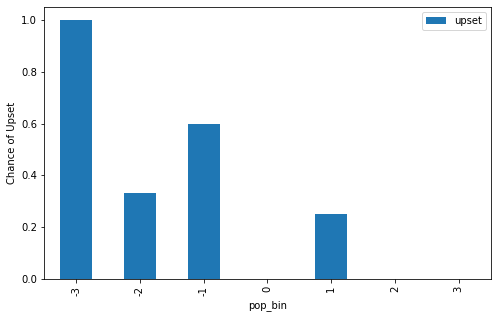

In [413]:
pop_list = [-3, -2, -1, 0, 1, 2, 3]
chart(pop, pop_list)

Youtube Comments:

We followed what we did for popularity above to create a bar chart for the difference in youtube comments. As one can see, there is a similar left skew. This means that the song with more youtube comments on their official music video are more likely to win their matchup.

In [414]:
print('(',train_df.comments.min(),',',train_df.comments.max(), ')',train_df.comments.max() - train_df.comments.min())

( -1000567 , 968932 ) 1969499


In [415]:
train_df['comms'] = 0
train_df.loc[(train_df['comments'] < -1000000), 'comms'] = -1
train_df.loc[(train_df['comments'] >= -1000000) & (train_df['comments'] < -750000), 'comms'] = -.75
train_df.loc[(train_df['comments'] >= -750000) & (train_df['comments'] < -500000), 'comms'] = -.5
train_df.loc[(train_df['comments'] >= -500000) & (train_df['comments'] < -250000), 'comms'] = -.25
train_df.loc[(train_df['comments'] >= -250000) & (train_df['comments'] < 0), 'comms'] = 0
train_df.loc[(train_df['comments'] >= 0) & (train_df['comments'] < 250000), 'comms'] = .25
train_df.loc[(train_df['comments'] >= 250000) & (train_df['comments'] < 500000), 'comms'] = .5
train_df.loc[(train_df['comments'] >= 500000) & (train_df['comments'] < 750000), 'comms'] = .75
train_df.loc[(train_df['comments'] >= 750000), 'comms'] = 1

In [416]:
yt_comm = train_df.groupby('comms').mean()
yt_comm = pd.DataFrame(yt_comm.upset)

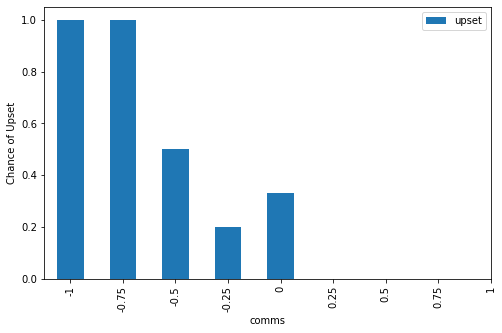

In [417]:
yt_list = [-1, -.75, -.5, -.25, 0, .25, .5, .75, 1]
chart(yt_comm, yt_list)

**Decision Tree**

We decided to use a decision tree trained on the independent variables of difference of twitter followers, energyz, number of comments in youtube, the songs' popularity on spotify and their duration in minutes. We went through many iterations of this tree until we were sure that the prediction utilized a majority of the most promising variables. 

Initially, we used the decision tree to predict the first round of the current competition. Then, when we ran the entire bracket prediction in a later cell, we compared the results to ensure that the values matched. 

In [434]:
tree_list = ['followers','energy','popularity', 'minutes','comments'] #['pop_cubed','followers','popularity','acousticness','energy','instrumentalness','speechiness', 'abs_seed_diff','key','sharp','likes_views','liveness']
X_train = train_df[tree_list]
X_train.head()

,followers,energy,popularity,minutes,comments
0,11342032,0.035,26,-0.552217,66310
1,-4106326,0.229,23,-0.328233,22556
2,483890,-0.040,-25,-0.227933,126346
3,31206,0.330,42,0.915783,21167
4,-11522242,-0.064,32,-0.631550,93572


In [419]:
train_df.describe()

,WSeed,Lseed,seed_diff,upset,high_seed_x,low_seed_x,abs_seed_diff,lfollowers,lviewCount,llikeCount,ldislikeCount,lcommentCount,lpopularity,ldanceability,lacousticness,ldanceability,lenergy,linstrumentalness,lliveness,lloudness,lspeechiness,ltempo,lkey,lmode,lminutes,lyear,lsharp,hfollowers,hviewCount,hlikeCount,hdislikeCount,hcommentCount,hpopularity,hdanceability,hacousticness,hdanceability,henergy,hinstrumentalness,hliveness,hloudness,hspeechiness,htempo,hkey,hmode,hminutes,hyear,hsharp,popularity,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,minutes,year,sharp,followers,likes_views,pop_cubed,likes,comments,pop_bin,comms
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,3.000000e+01,3.000000e+01,30.000000,30.00000
mean,5.933333,8.366667,2.433333,0.366667,3.833333,10.466667,6.633333,1.204578e+07,7.504366e+08,2.600613e+06,175418.400000,1.539668e+05,53.633333,0.730700,0.142285,0.730700,0.817367,0.000001,0.214947,-5.255867,0.071073,116.878533,5.066667,0.666667,3.730025,2015.500000,2.600000,6.105426e+06,8.865668e+08,3.241048e+06,209609.433333,1.369181e+05,58.433333,0.711767,0.133289,0.711767,0.818933,0.000032,0.126767,-4.597467,0.071570,112.234700,6.400000,0.400000,3.563456,2016.433333,2.600000,4.800000,-0.008995,0.001567,0.000030,-0.088180,0.65840,0.000497,-4.643833,1.333333,-0.166569,0.933333,0.000000,-5.940352e+06,-0.000392,6683.800000,6.404345e+05,-1.704873e+04,0.400000,0.12500
std,4.160018,4.723261,7.532382,0.490133,2.506314,3.692801,4.164574,1.919014e+07,8.711899e+08,3.538436e+06,227653.314472,3.043131e+05,16.742437,0.052209,0.105596,0.052209,0.113726,0.000007,0.118098,1.299438,0.041733,28.534814,4.274490,0.479463,0.741963,2.285637,1.714039,1.000894e+07,9.288930e+08,4.487273e+06,276043.242047,2.217033e+05,11.285277,0.058782,0.222205,0.058782,0.117222,0.000047,0.074947,2.131566,0.039958,24.515866,4.148951,0.498273,0.741601,1.250747,1.302517,21.254452,0.261636,0.178047,0.000045,0.128572,2.70543,0.053642,41.370871,5.725523,1.176723,3.161551,2.034191,2.140676e+07,0.003891,22456.111755,5.830389e+06,3.872512e+05,2.061135,0.38702
min,1.000000,1.000000,-11.000000,0.000000,1.000000,4.000000,1.000000,1.355000e+03,3.354560e+05,2.204000e+03,69.000000,8.200000e+01,27.000000,0.579000,0.003680,0.579000,0.624000,0.000000,0.027100,-7.583000,0.032200,93.021000,0.000000,0.000000,2.983333,2011.000000,0.000000,2.549700e+04,1.511098e+07,7.518300e+04,3023.000000,2.031000e+03,47.000000,0.579000,0.003680,0.579000,0.665000,0.000000,0.035300,-7.765000,0.034300,93.979000,0.000000,0.000000,2.983333,2013.000000,0.000000,-26.000000,-0.252000,-0.267000,-0.000001,-0.312700,-2.94800,-0.075600,-82.740000,-8.000000,-2.412967,-4.000000,-2.000000,-5.219375e+07,-0.007593,-17576.000000,-1.117546e+07,-1.000567e+06,-3.000000,-1.00000
25%,3.000000,4.250000,-3.750000,0.000000,2.000000,7.250000,3.000000,7.731600e+04,1.522475e+07,1.025745e+05,3023.000000,2.866000e+03,46.250000,0.707000,0.082400,0.707000,0.729000,0.000000,0.106500,-6.070000,0.040600,95.046000,0.000000,0.000000,3.245700,2014.000000,1.250000,2.317840e+05,6.157618e+07,2.884182e+05,12323.500000,1.203225e+04,48.000000,0.673000,0.018700,0.673000,0.687000,0.000000,0.089100,-6.031250,0.047900,102.037000,2.000000,0.000000,3.046375,2016.000000,2.000000,-13.250000,-0.186500,-0.136500,0.000000,-0.202675,-1.48600,-0.030200,-20.493250,-2.000000,-0.658750,-1.000000,-1.750000,-5.758334e+06,-0.00241

In [420]:
Y_train = train_df[['upset']]

In [421]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=3)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=3)

In [422]:
! pip install graphviz
import graphviz
from sklearn import tree

In [423]:
dot_data = tree.export_graphviz(decision_tree, out_file='C:/Users/student/Documents/loco_tree.dot')

In [424]:
X_test = test_df[tree_list]
X_test

,followers,energy,popularity,minutes,comments
0,52400034,-0.077,30,-2.019200,1030926
1,2384189,-0.046,-34,-0.289167,-19407
2,4999656,0.278,11,0.582367,70373
3,31206,0.140,16,-0.495333,5497
4,10224062,0.116,37,0.502000,69265
5,-5148453,0.062,5,1.229550,-166990
6,1124169,-0.438,20,-0.251100,105784
7,-6264842,0.190,-7,0.326533,-436391


In [425]:
Y_pred = decision_tree.predict(X_test)

In [426]:
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 1])

In [427]:
df = pd.DataFrame()

We dropped a few additional insignificant columns from the train dataset. 

In [428]:
train_df.drop(['WSong','WSeed','LSong','Lseed'], axis=1,inplace=True)

**Simulation**

To create a bracket simulation, one has to ask themselves, "How does a bracket set up its matchups?" Like the NCAA March Madness tournament, the Locura de Marzo tournements are set up as predetermined matchups (i.e. the winner of the 1 vs. 16 game will inevitabbly play the winner of the 8 vs 9 game not matter the outcome of the game. The plan was to input each of the 16 songs into one dataframe (df_oct) and create a for loop that uses the dataframe to match up the correct songs based on their seed (index in the dataframe). Go to the LOctobre notebook cells 18-28 to see my test code and the explaination of how the simulation got to this point

Simulation 4:

The first cell is a copy of cell 25 in the LOctobre dataframe. Because we were using the format of the train and test df from above, we had to find a way to reformat two rows from the df_oct dataframe to match the format of the train and test df. The function "upset(h, l)" reformats the data, runs it through the decision tree, and returns the decision of the decision tree. The variable "reformat" holds the reformatted data in a list that matches the format of the test_df so it can run through the decision tree. 

From there, to create a dataframe, I had to make a dictionary that I could convert the dictionary into a useable dataframe. To do this, we zipped new_heads, a list of headers from test_df, and reformat together. From there, a_dictionary is created by converting the zipped file into a dictionary. With the dictionary, we created df_temp, which matched the format of the test_df. Our group then created a new dataframe, which created a new dataframe that has the variables needed to run in the decision tree. The function returns the result of the decision tree (Y_pred) in the form of an integer (1 for there was an upset, 0 for no upset).

To incorporate the new variable created by the upset function, we ran "upset" in the nested for loop with h and l going inside the parantheses and set the result equal to "result". The variable "result" is what was ran in the if statements (if result = 1, the l wins. if result = 0, h wins).

When we ran the code with the edits, there was a reindexing error after the code ran successfully after one round. The code returned an error stating, "Reindexing only valid with uniquely valued Index objects*. We did not know what this meant, so to troubleshoot this issue, we put the code from the third simulation to see if that would work. It did not.

*If you want to see error message that was produced, the code is 3 cells down. Click on the cell, change the cell type to code and click run.

In [429]:
df_r1 = df_oct
df_r2 = []
df_r3 = []
df_r4 = []
df_winner = []

rounds = [df_r1, df_r2, df_r3, df_r4, df_winner]

In [437]:
new_heads = X_test.columns.tolist()
def upset(h, l):
    reformat = [h[1]-l[1],h[15]-l[15],h[11]-l[11], (h[10]/60000)-(l[10]/60000), h[5]-l[5]]
    zip_iterator = zip(new_heads, reformat)
    a_dictionary = dict(zip_iterator)
    df_test = pd.DataFrame(a_dictionary, index = [0])
    Y_pred = decision_tree.predict(df_test)
    return int(Y_pred)

In [436]:
simp = df_oct.columns.tolist()
for x in range (0,len(df_oct)):
    print(x, simp[x])

0 seed
1 followers
2 viewCount
3 likeCount
4 dislikeCount
5 commentCount
6 name
7 album
8 artist
9 release_date
10 length
11 popularity
12 danceability
13 acousticness
14 danceability
15 energy


**THE FINAL SIMULATION**

After many attempts to make the code work, we discovered that inputting dataframe-formatted rows into lists maintained their format. For the rounds after the first round, we stored the dataframe rows in lists so they could run in through the simulation. To test this, I replaced all of the instances of the rounds list with a new list called matchs. The issue that popped up as a result was when the second round kicked off, it would get an error message when defining h because iloc is a dataframe-specific command, and since the laters rounds are formatted as lists, this was causing an error because the variable types did not match up. To fix this, we inserted a second if statement in the nested for loop. If it was the first round (r = 0), then the variables h and l would use iloc to retrieve the rows. Otherwise, the variables would use the list equivilent function. Finally, because this was already formatted as a list, the I could set my wins list equal to the next list in matchs.

I used the old format of rounds as and just changed the variables from df_r2 to df_winner into empty lists. To make the printed output more readable, at the start of each round, I print the round number. Between each printed matchup and winner, I entered an extra line to space it out. Finally, to seperate the rounds, I printed a line at the end of each round to get it clear seperation.

The final two cells reallocate the data from the rounds list into their own variables and prints out the songs that made it to each round. 

In [438]:
rounds = [df_r1, df_r2, df_r3, df_r4, df_winner]
for r in range (0,4):
    print('Round ', r+1, ':')
    wins = []
    y = len(rounds[r])/2
    y = int(y)
    for x in range(0, y):
        if r == 0:
            h = rounds[r].iloc[x]
            l = rounds[r].iloc[-x-1]
        else:
            h = rounds[r][x]
            l = rounds[r][-x-1]
        print(h['name'], ' vs. ', l['name'])
        result = upset(h, l)
        if result == 0: 
            wins.append(h)
            print("Winner:", h['name'])
        if result == 1:
            wins.append(l)
            print("Winner:", l['name'])
        print('\n')
    rounds[r+1] = wins
    print("_" * 120)

Round  1 :
Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)  vs.  Yo Voy Ganao
Winner: Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)


Lo Mismo  vs.  Cuando Nadie Ve
Winner: Lo Mismo


Robarte un Beso  vs.  Soy Yo
Winner: Robarte un Beso


La Libertad  vs.  Baila
Winner: La Libertad


Vivir Mi Vida  vs.  Somos los Prietos (feat. Alexis Play)
Winner: Vivir Mi Vida


Andas En Mi Cabeza  vs.  Échame La Culpa
Winner: Échame La Culpa


Un Año  vs.  El Mismo Sol
Winner: Un Año


Cásate Conmigo  vs.  Mi Gente
Winner: Mi Gente


________________________________________________________________________________________________________________________
Round  2 :
Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)  vs.  Mi Gente
Winner: Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)


Lo Mismo  v

In [439]:
df_r1 = rounds[0]
df_r2 = rounds[1]
df_r3 = rounds[2]
df_r4 = rounds[3]
df_winner = rounds[4]

In [440]:
rounds = [df_r1, df_r2, df_r3, df_r4, df_winner]
later = [df_r2, df_r3, df_r4, df_winner]
for z in later:
    for x in z:
        print(x['seed'], ':', x['name'])
    print('_' * 100)

1 : Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)
2 : Lo Mismo
3 : Robarte un Beso
4 : La Libertad
5 : Vivir Mi Vida
11 : Échame La Culpa
7 : Un Año
9 : Mi Gente
____________________________________________________________________________________________________
1 : Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)
7 : Un Año
11 : Échame La Culpa
5 : Vivir Mi Vida
____________________________________________________________________________________________________
1 : Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)
11 : Échame La Culpa
____________________________________________________________________________________________________
1 : Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)
__________________________________________________________________________________________________